# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys

if '/home/as259691/PycharmProjects/FluidDyn1D' not in sys.path:
    sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path
savefig_path = '/home/as259691/Documents/rapports/article_JCP/figures/'
save_fig = False

In [2]:
from src.main import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)
rc('font', size=18)
rc('legend', fontsize=16)
rc('figure', max_open_warning=80)

In [3]:
n_max = 10**8

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
markers = Bulles(phy_prop=phy_prop)
Formulation = [Problem, ProblemConserv2]

n_lim = 1000
t_fin = 0.02

In [5]:
def compare_energy_forme(formu, phy_prop, num_prop, markers, t_fin, t_list=None):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for form in formu:
        print()
        prob = form(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
        if t_list is not None:
            t_list.append(prob.dt)
        E0 = prob.energy
        print(prob.name)
        print('==========================')
        t, e = prob.timestep(t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=5, debug=None, plotter=Plotter('decale'))
        l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
        n = len(e)
        i0 = int(n/5)
        dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
        # par Dt / rho_cp_l T_l V
        print('dE*/dt* = %g' % dedt_adim)
    le = fig1.legend()
    ax1.grid(b=True, which='major')
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', alpha=0.2)
    fig1.tight_layout()
    return e[-1] - e[0]

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

### RK4

<IPython.core.display.Javascript object>


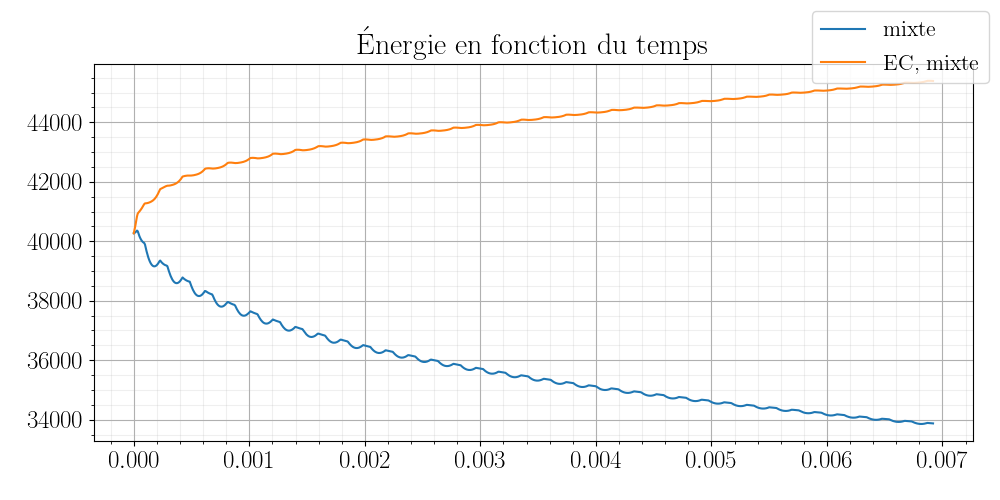


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


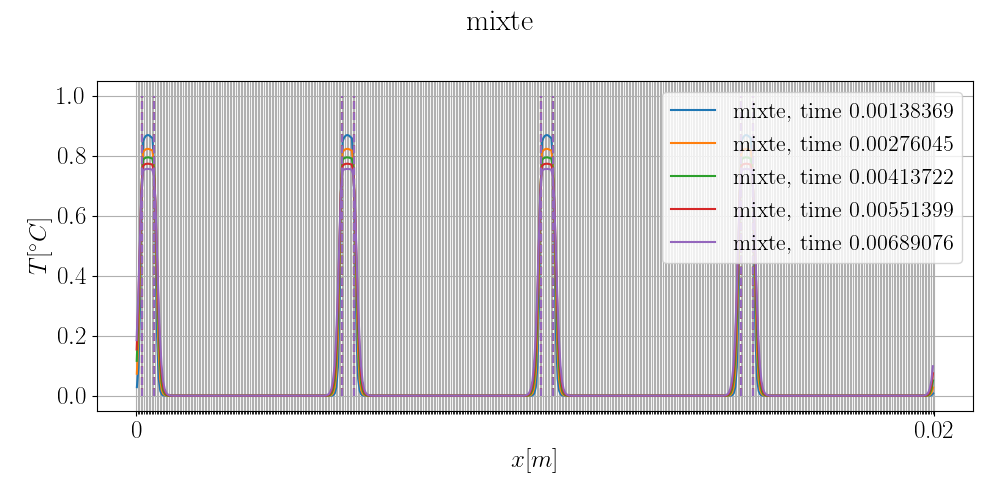

dE*/dt* = -9.90437e-05

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


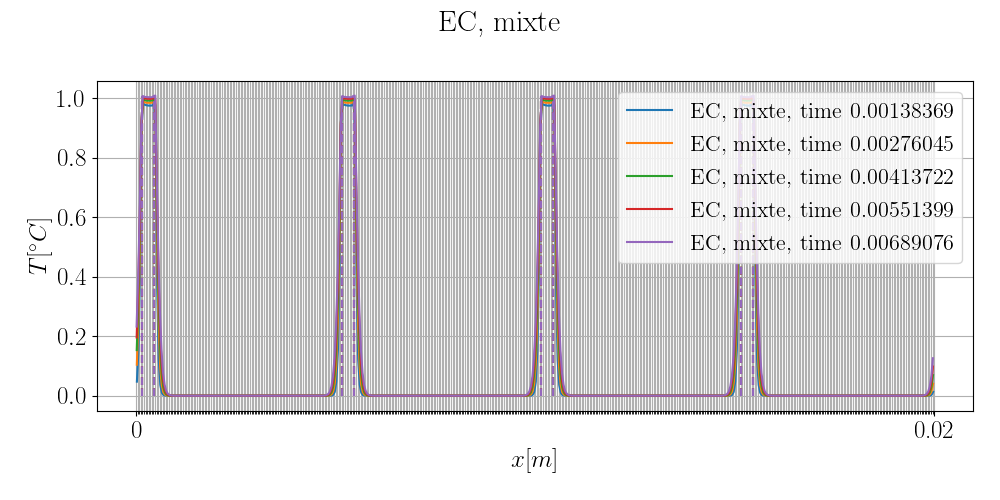

dE*/dt* = 7.31611e-05


0.002559977094214072

In [6]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop, cfl=0.5)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

### Euler

In [7]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop)

<IPython.core.display.Javascript object>


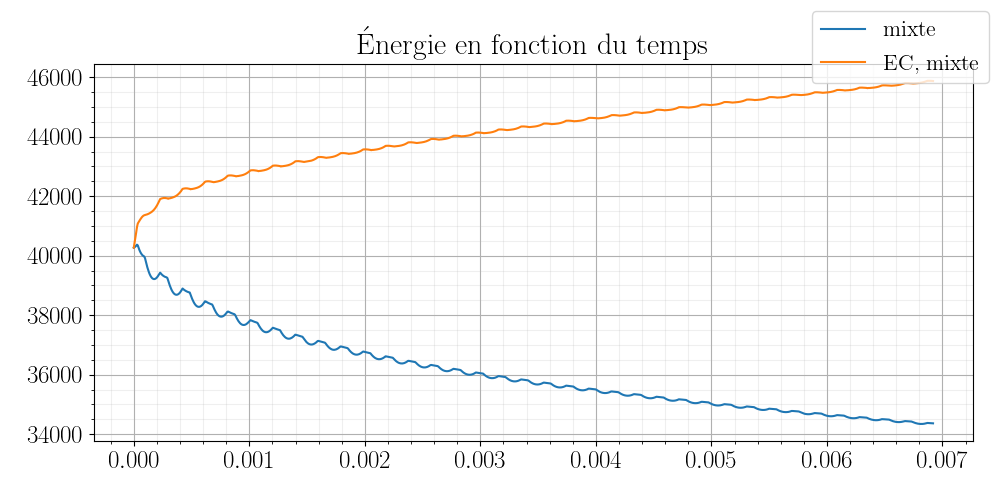


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


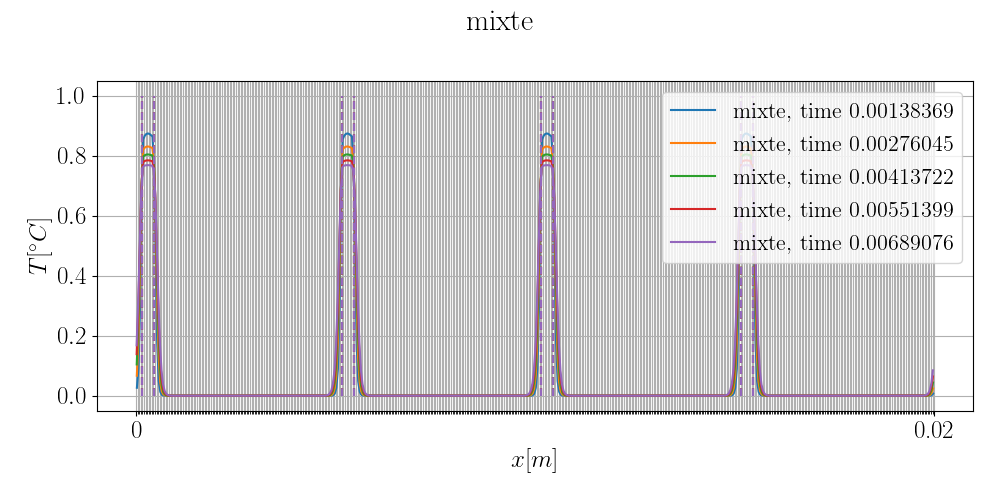

dE*/dt* = -9.07465e-05

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


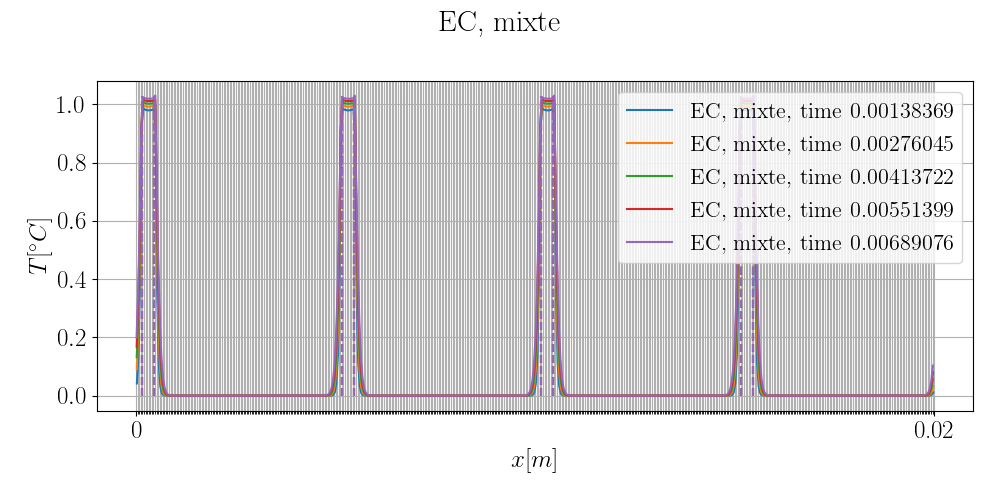

dE*/dt* = 8.51523e-05


0.002800406298212668

In [8]:
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface

<IPython.core.display.Javascript object>


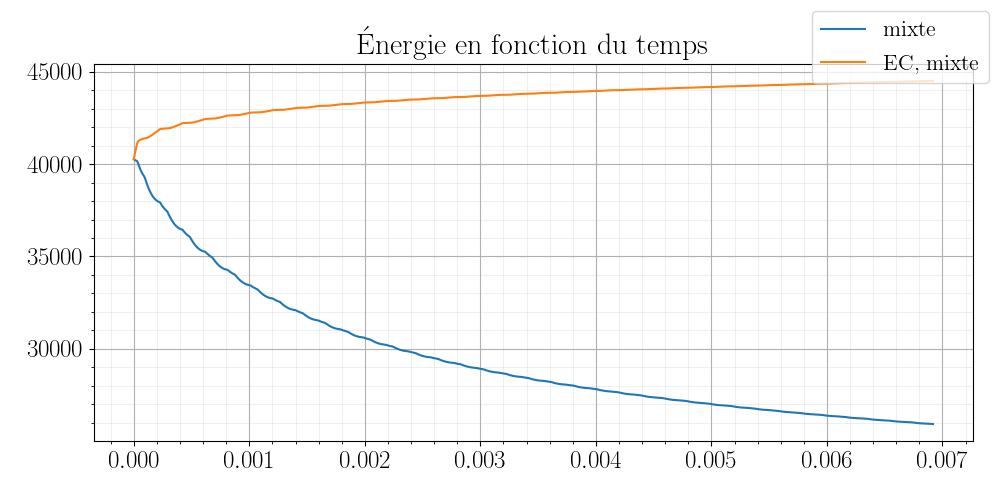


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


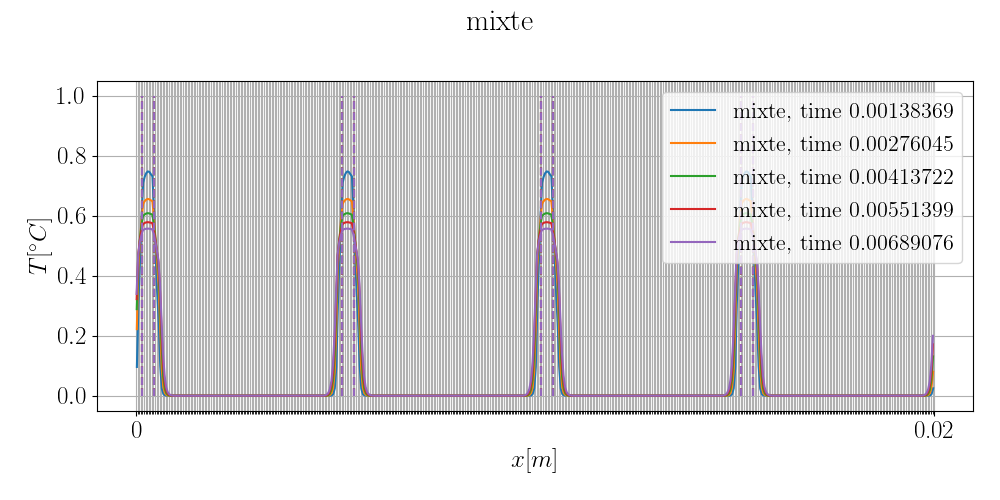

dE*/dt* = -0.000191823

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


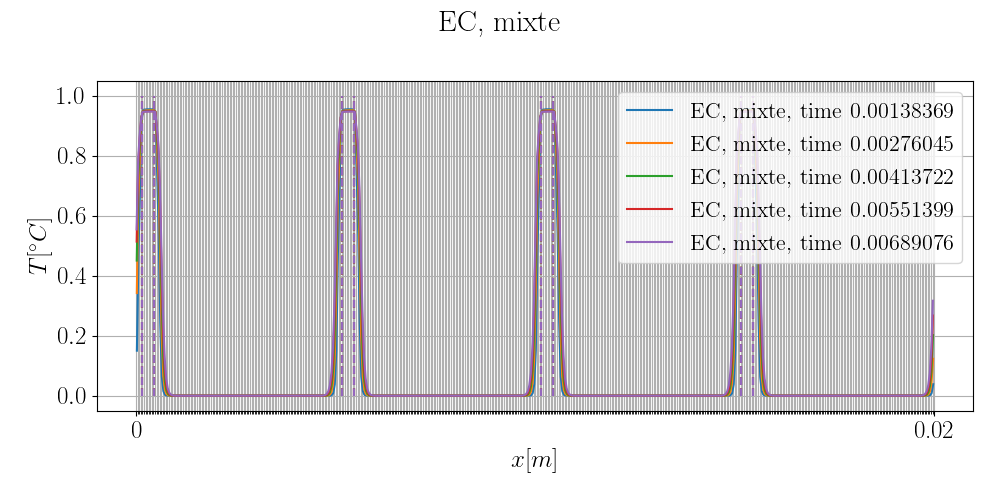

dE*/dt* = 4.62274e-05


0.002121835838716321

In [9]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

# Étude numérique

## Étude en $\Delta x$

dt fourier
1.1335161290322582e-07


<IPython.core.display.Javascript object>


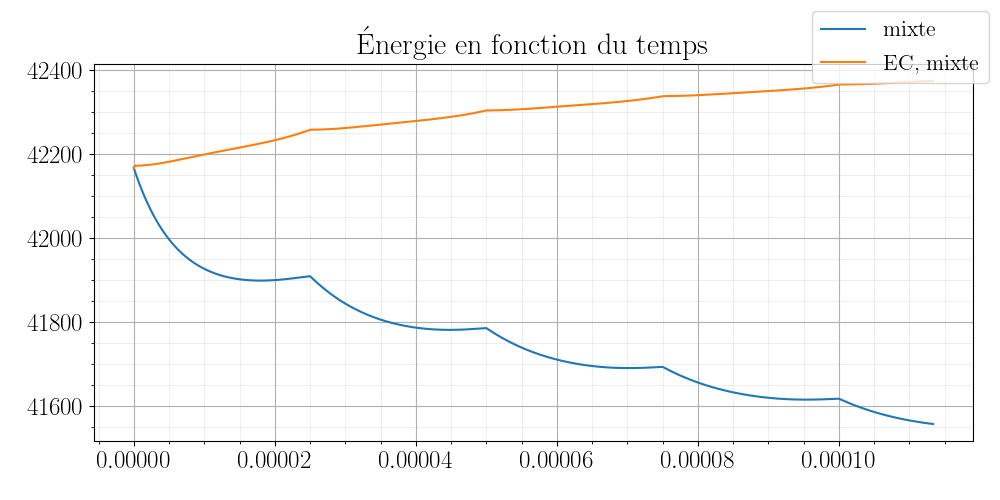


dt min
1.1335161290322582e-07
mixte


<IPython.core.display.Javascript object>


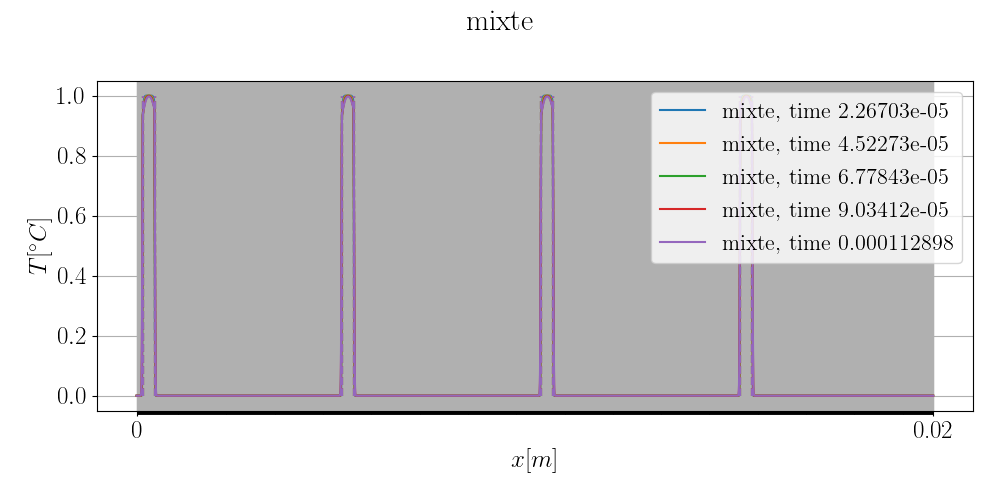

dE*/dt* = -1.02824e-05

dt min
1.1335161290322582e-07
EC, mixte


<IPython.core.display.Javascript object>


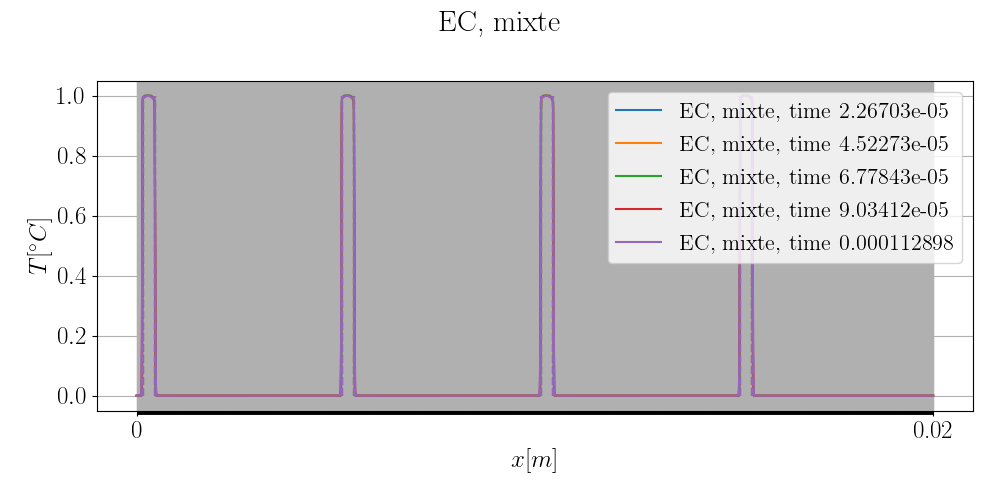

dE*/dt* = 3.83795e-06


<IPython.core.display.Javascript object>


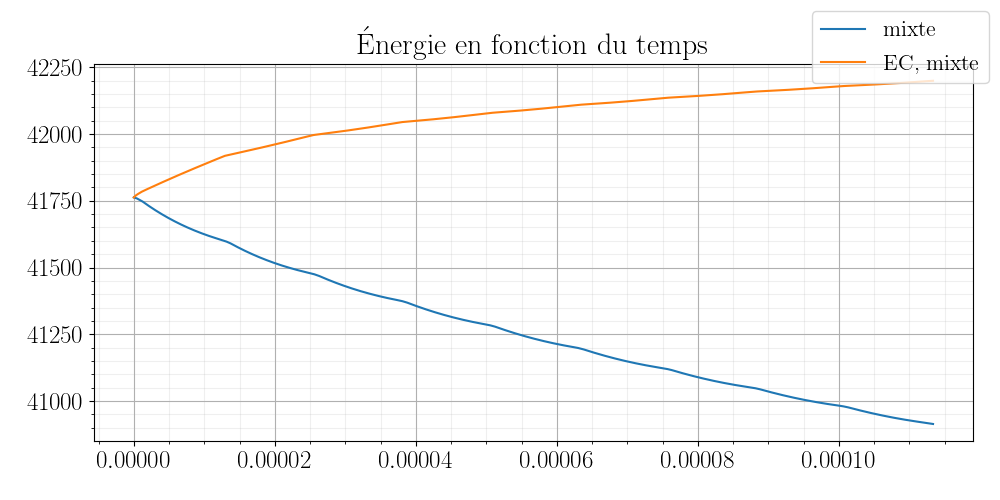


dt min
1.1335161290322582e-07
mixte


<IPython.core.display.Javascript object>


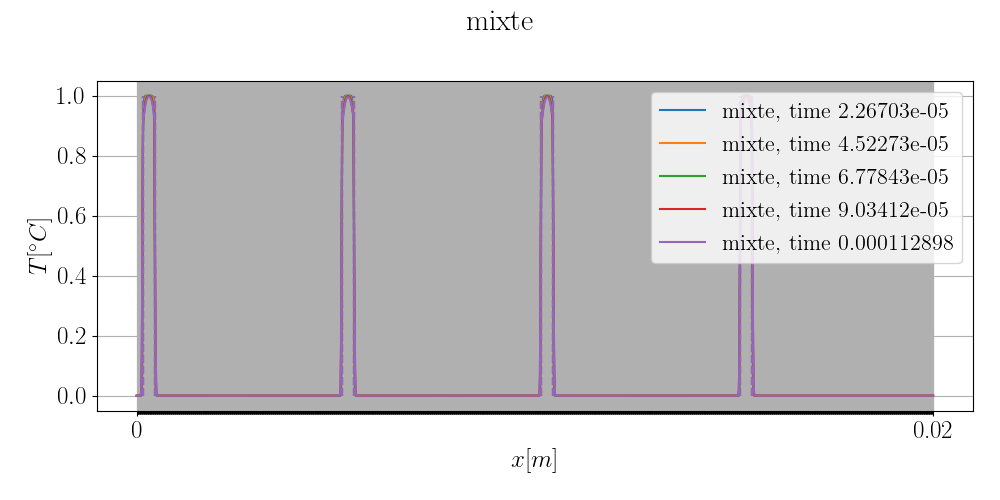

dE*/dt* = -1.73601e-05

dt min
1.1335161290322582e-07
EC, mixte


<IPython.core.display.Javascript object>


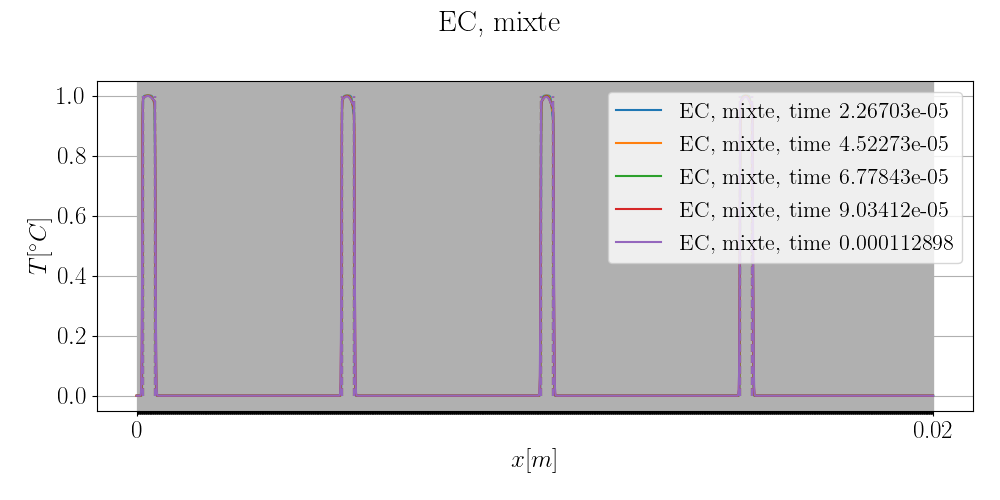

dE*/dt* = 6.6228e-06


<IPython.core.display.Javascript object>


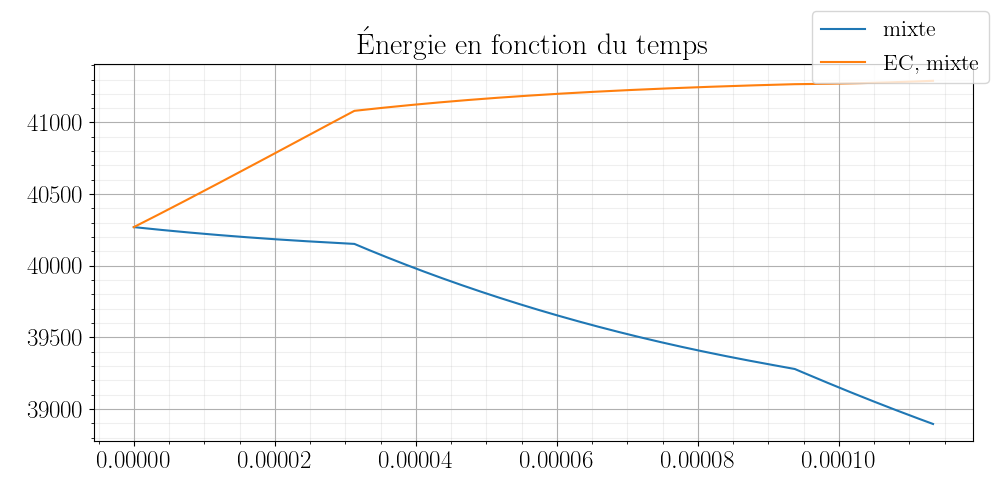


dt min
1.1335161290322582e-07
mixte


<IPython.core.display.Javascript object>


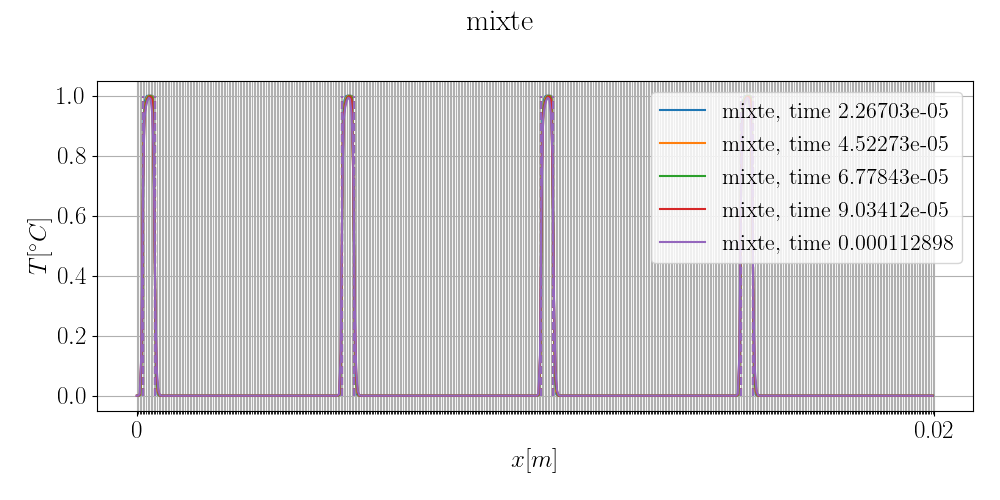

dE*/dt* = -3.9781e-05

dt min
1.1335161290322582e-07
EC, mixte


<IPython.core.display.Javascript object>


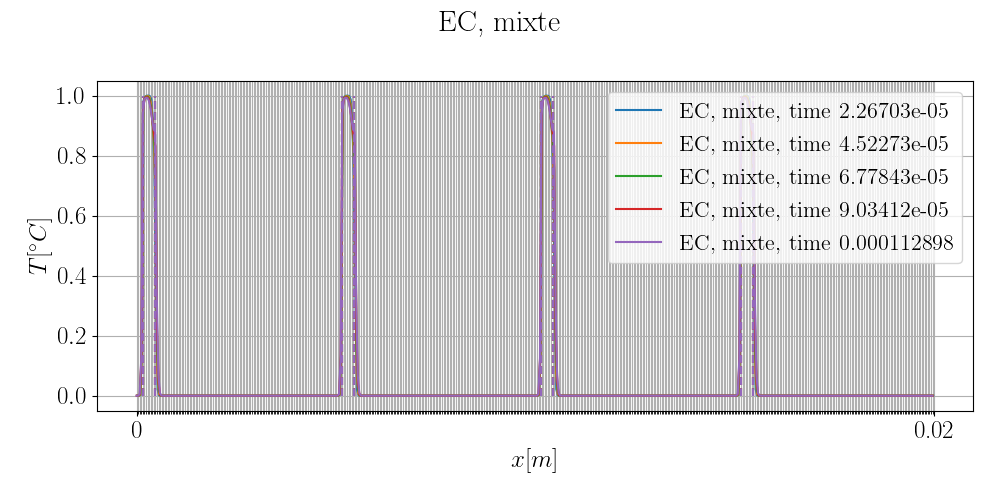

dE*/dt* = 1.35426e-05


<IPython.core.display.Javascript object>


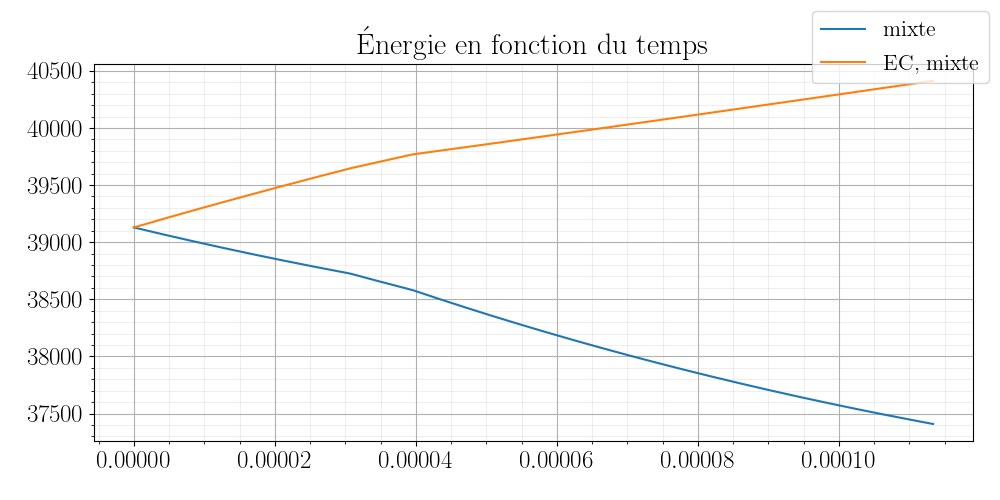


dt min
1.1335161290322582e-07
mixte


<IPython.core.display.Javascript object>


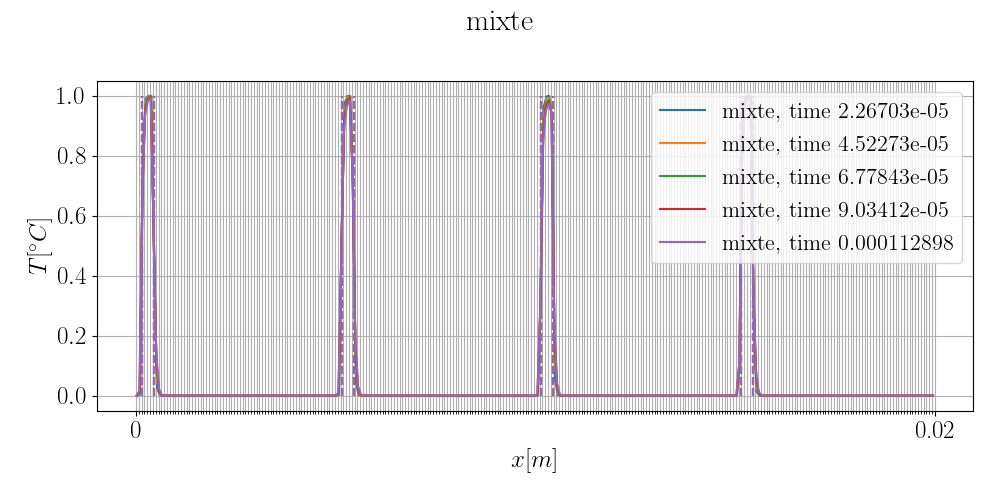

dE*/dt* = -4.51145e-05

dt min
1.1335161290322582e-07
EC, mixte


<IPython.core.display.Javascript object>


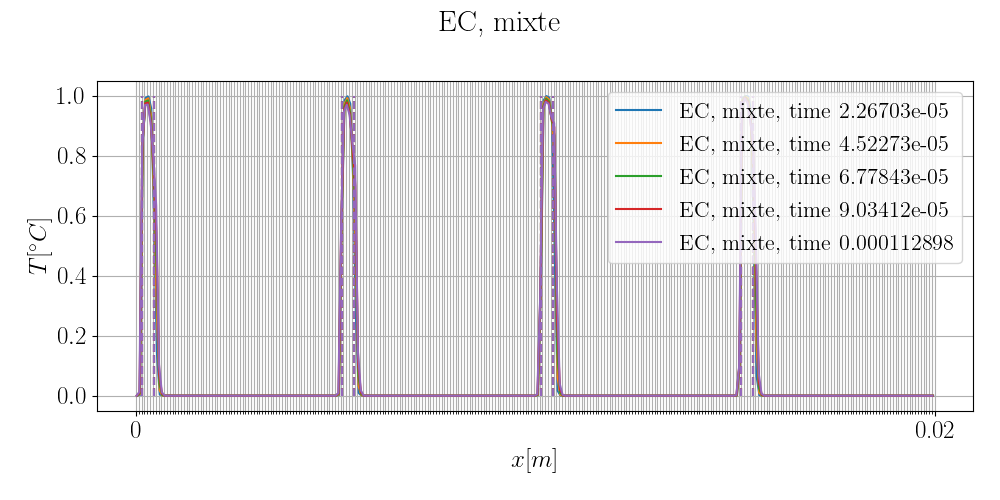

dE*/dt* = 2.8595e-05


<IPython.core.display.Javascript object>


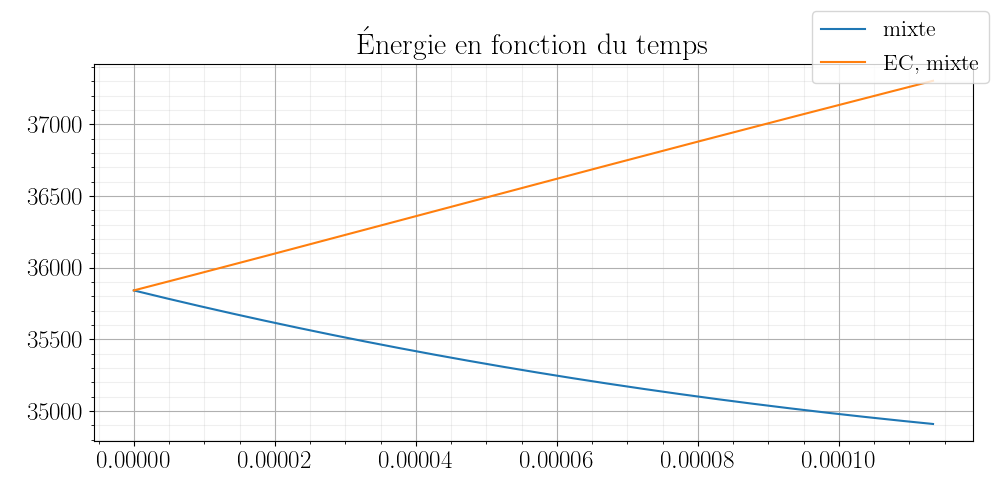


dt min
1.1335161290322582e-07
mixte


<IPython.core.display.Javascript object>


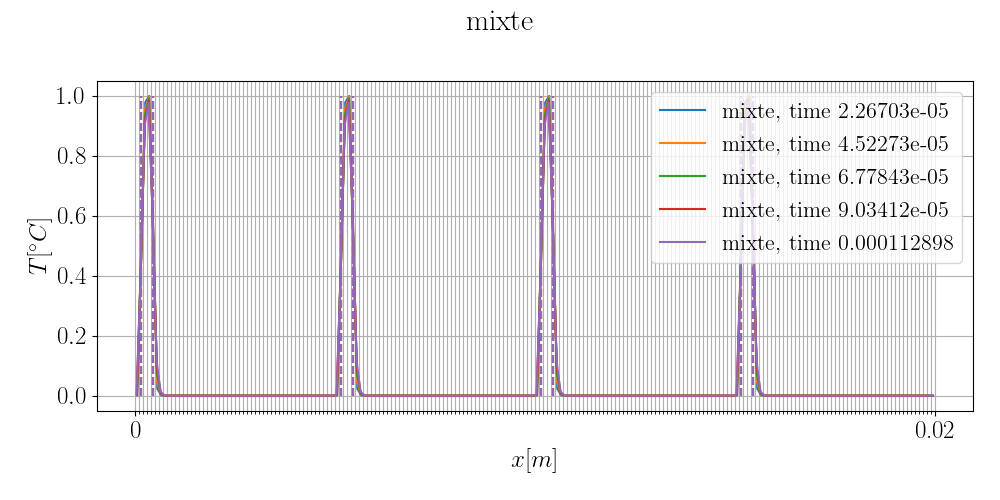

dE*/dt* = -2.36235e-05

dt min
1.1335161290322582e-07
EC, mixte


<IPython.core.display.Javascript object>


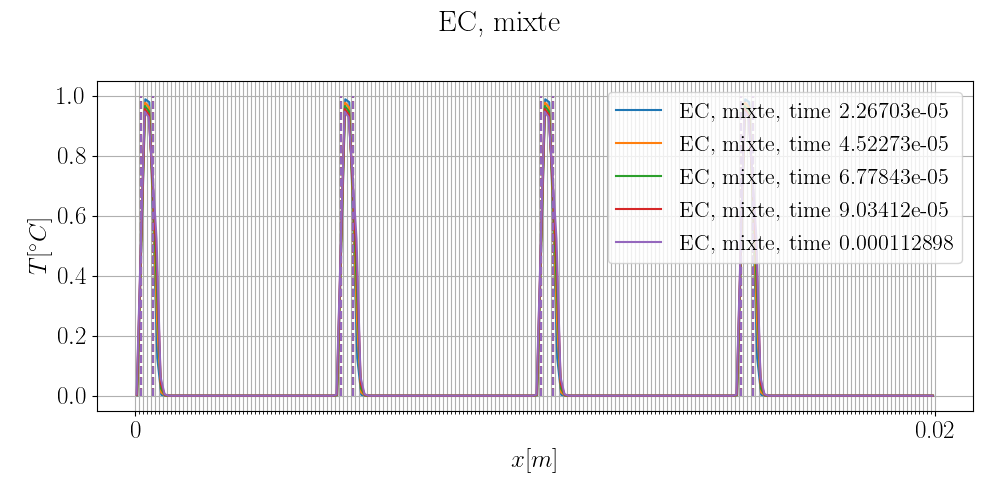

dE*/dt* = 4.08273e-05


In [10]:
dx_list = [5*10**-6, 1*10**-5, 3.9*10**-5, 7*10**-5, 10**-4]  # [5*10**-6, 1*10**-5, 3.9*10**-5, 7*10**-5]
t_fin = 0.05
perte_e_dx = []
num_prop = NumericalProperties(dx=min(dx_list), schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
prob = Problem(get_T_creneau, markers=markers, num_prop=num_prop, phy_prop=phy_prop)
dt_min = prob.dt
for dx in dx_list:
    num_prop = NumericalProperties(dx=dx, dt=dt_min, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
    perte_e_dx.append(compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin))

<IPython.core.display.Javascript object>


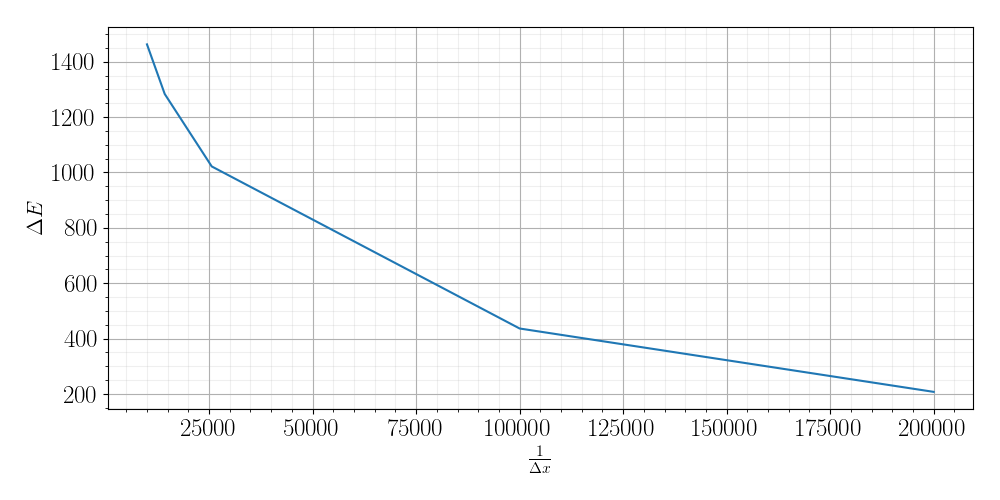

In [11]:
plt.figure()
plt.plot(1./np.array(dx_list), np.array(perte_e_dx)/(0.02*0.005*0.005))
plt.xlabel(r'$\frac{1}{\Delta x}$', size=16)
plt.ylabel(r'$\Delta E$', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor',alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dx.pdf')

<IPython.core.display.Javascript object>


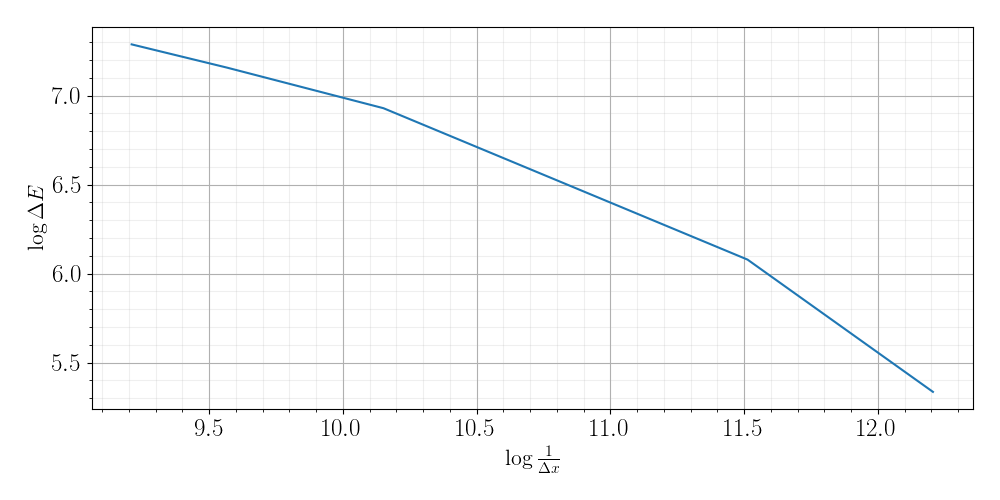

-0.6517777608114846


In [12]:
plt.figure()
x = np.log(1./np.array(dx_list))
y = np.log(np.array(perte_e_dx)/(0.02*0.005*0.005))
plt.plot(x, y)
plt.xlabel(r'$\log{\frac{1}{\Delta x}}$', size=16)
plt.ylabel(r'$\log{\Delta E}$', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
plt.tight_layout()
print((y[-1] - y[0])/(x[-1] - x[0]))
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dx_log.pdf')

## Étude en $\Delta t$

Ici on ne change pas $\Delta x$, mais on diminue dt_min pour qu'il soit contraignant

<IPython.core.display.Javascript object>


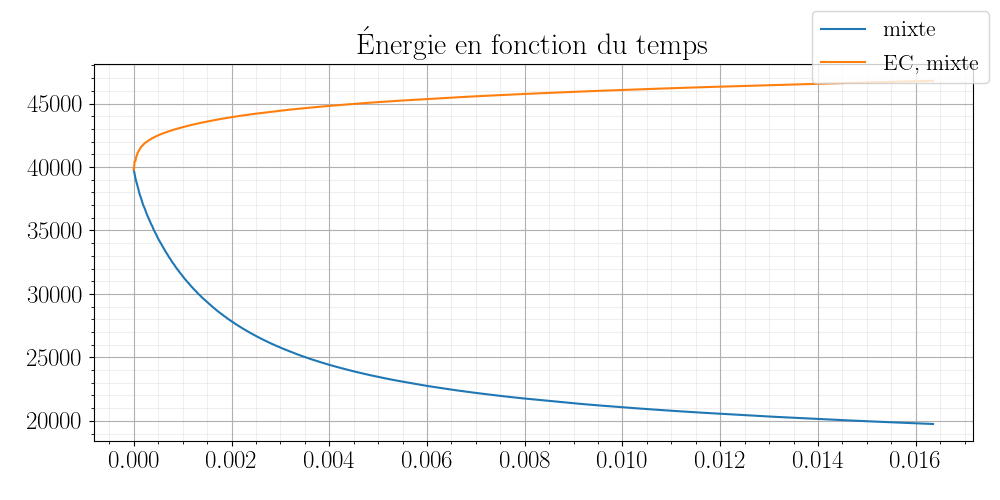


dt fourier
1.6355326555849658e-05
mixte


<IPython.core.display.Javascript object>


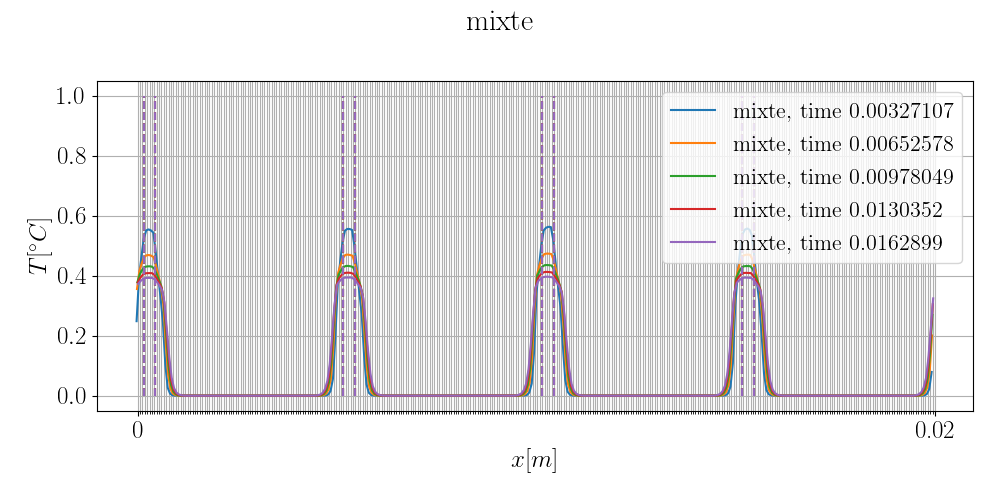

dE*/dt* = -0.000175882

dt fourier
1.6355326555849658e-05
EC, mixte


<IPython.core.display.Javascript object>


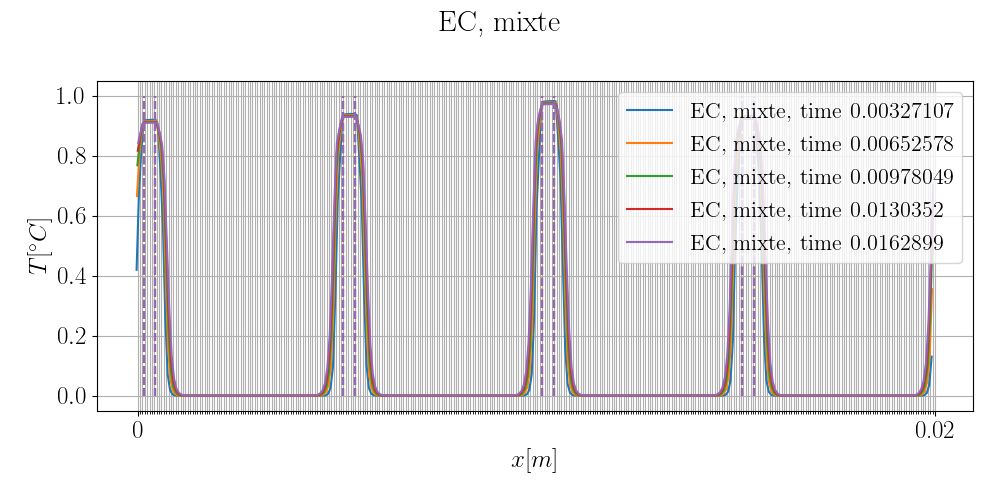

dE*/dt* = 7.05436e-05


<IPython.core.display.Javascript object>


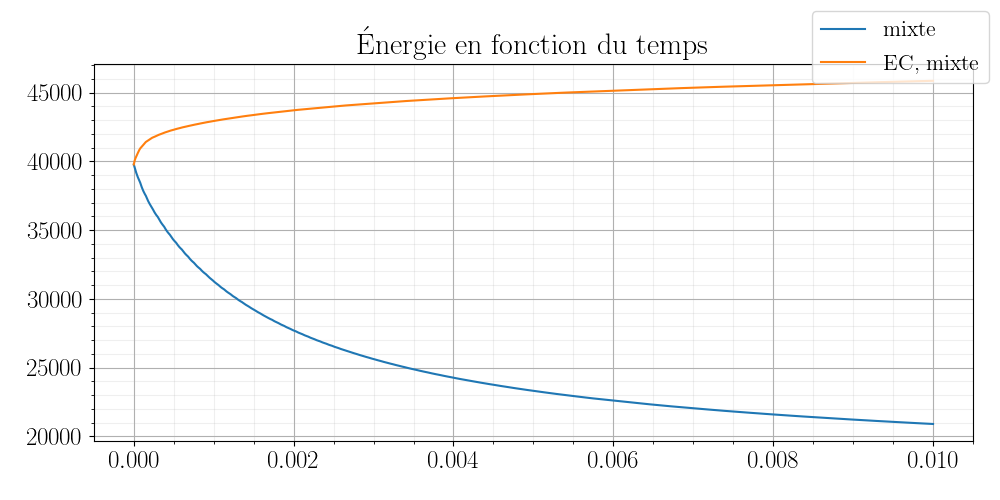


dt min
1e-05
mixte


<IPython.core.display.Javascript object>


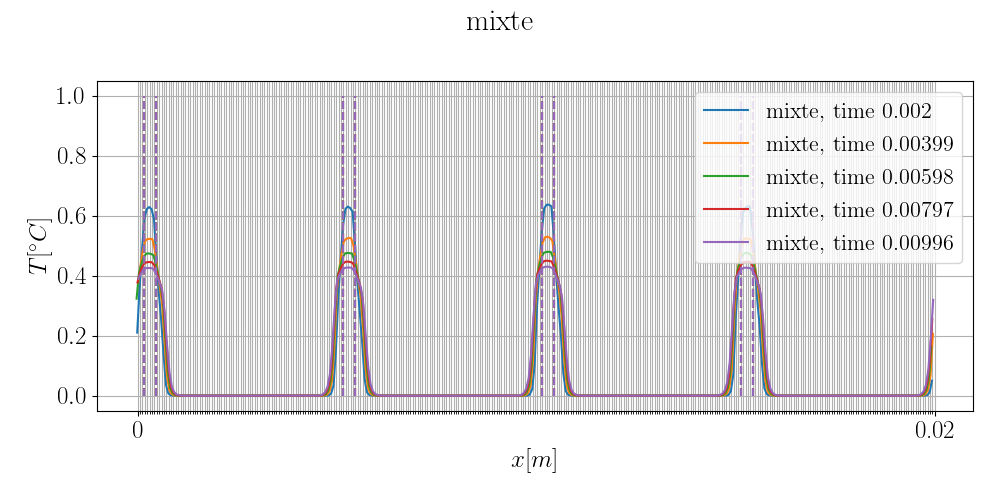

dE*/dt* = -0.000213585

dt min
1e-05
EC, mixte


<IPython.core.display.Javascript object>


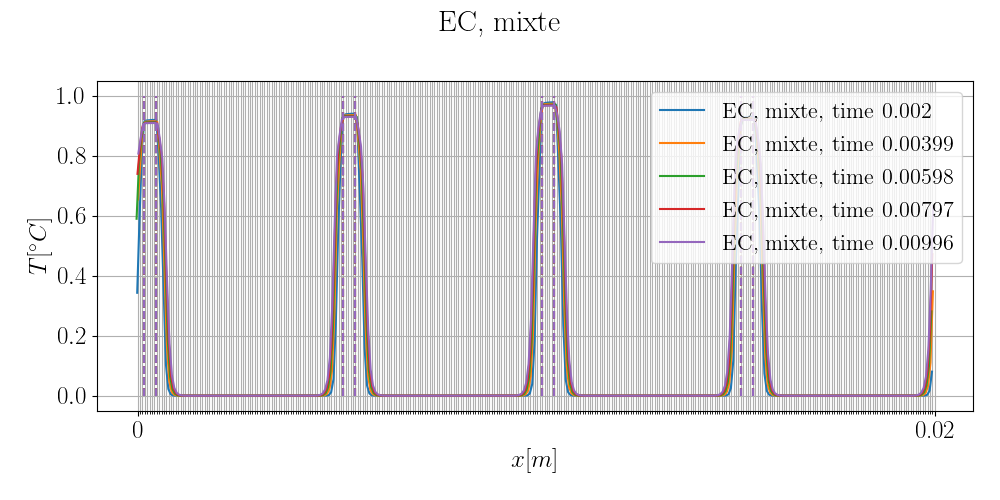

dE*/dt* = 6.73793e-05


<IPython.core.display.Javascript object>


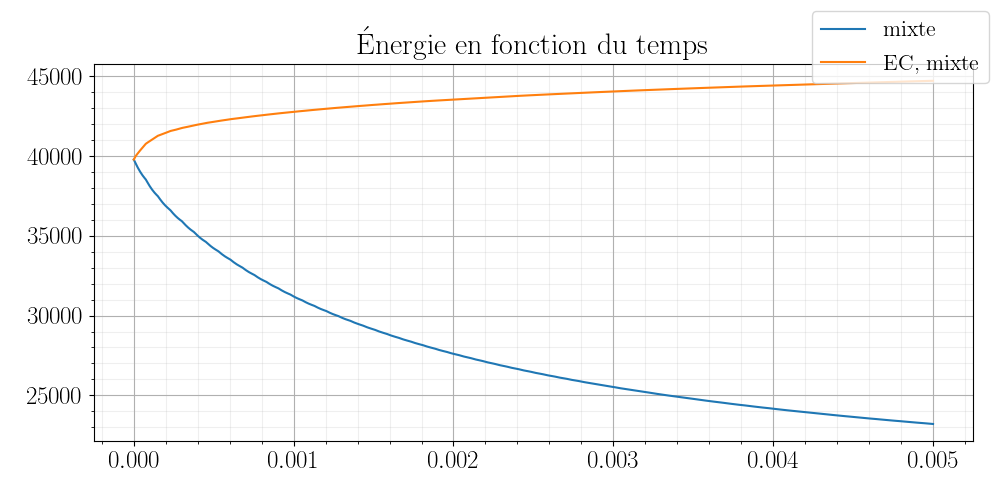


dt min
4.9999999999999996e-06
mixte


<IPython.core.display.Javascript object>


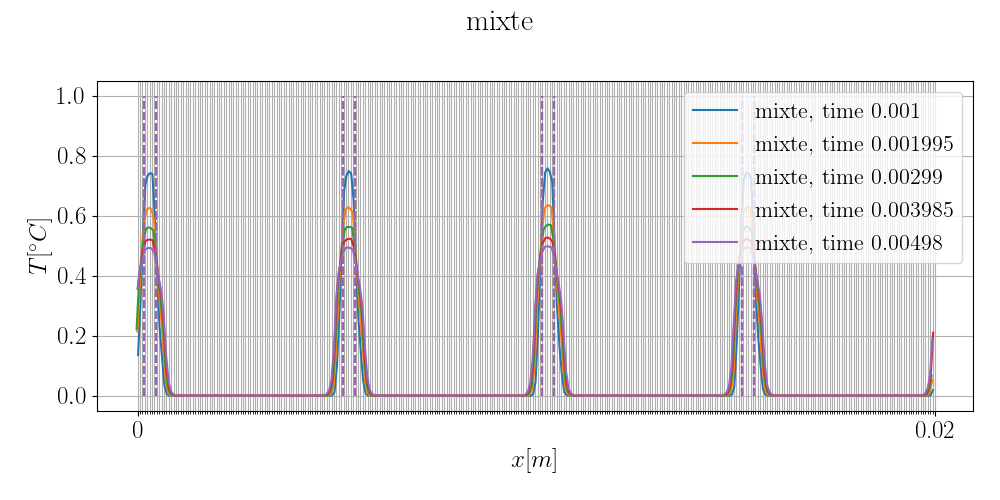

dE*/dt* = -0.000251142

dt min
4.9999999999999996e-06
EC, mixte


<IPython.core.display.Javascript object>


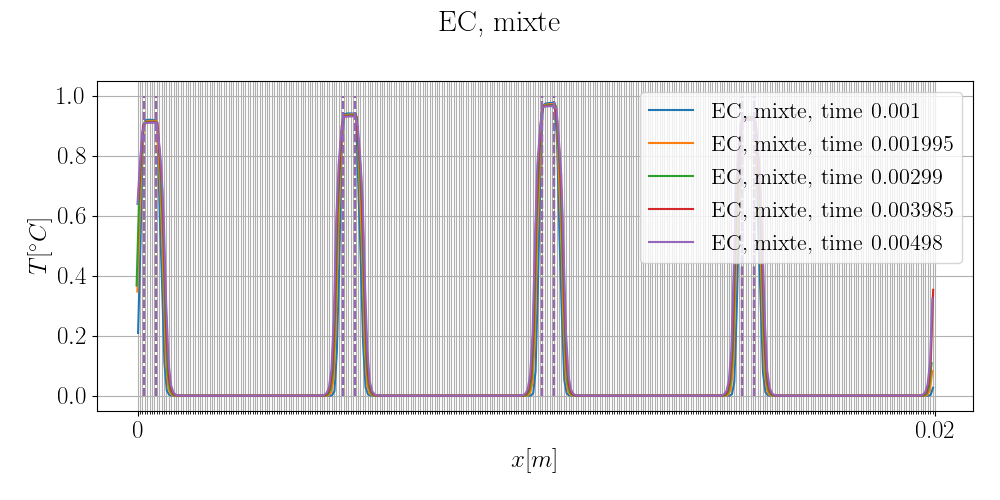

dE*/dt* = 6.11794e-05


In [13]:
dt_min_list = [2*10**-5, 1*10**-5, 5*10**-6]
dt_list = []
t_fin = 0.05
perte_e_dt = []
for dt in dt_min_list:
    num_prop = NumericalProperties(dx=6*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop, dt=dt)
    perte_e_dt.append(compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin, dt_list))

<IPython.core.display.Javascript object>


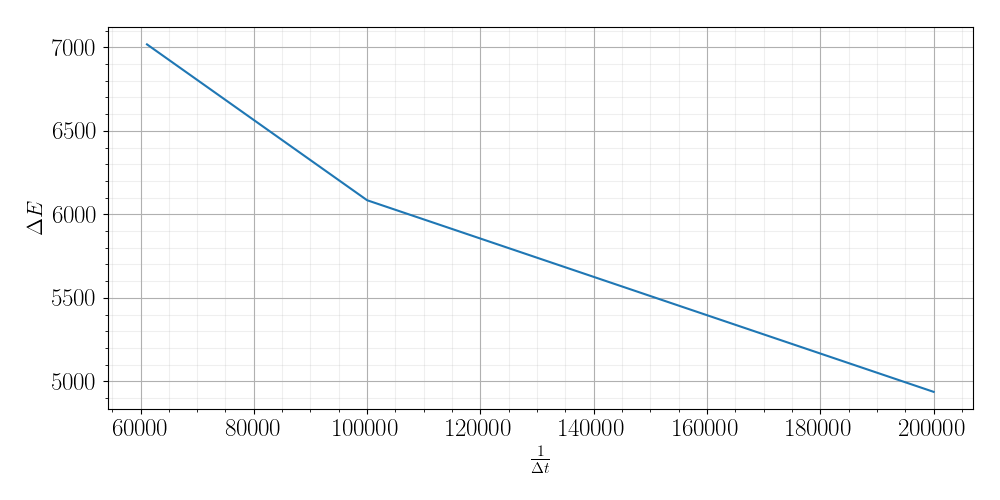

In [14]:
plt.figure()
plt.plot(1./np.array(dt_list[::2]), np.array(perte_e_dt)/(0.02*0.005*0.005))
plt.xlabel(r'$\frac{1}{\Delta t}$', size=16)
plt.ylabel(r'$\Delta E$', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dt.pdf')

<IPython.core.display.Javascript object>


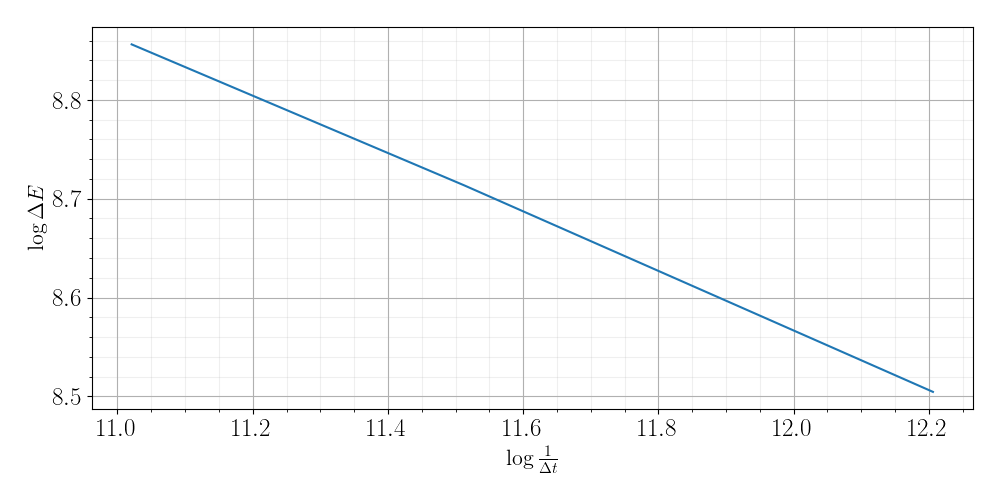

-0.2967387684660909


In [15]:
plt.figure()
x = np.log(1./np.array(dt_list[::2]))
y = np.log(np.array(perte_e_dt)/(0.02*0.005*0.005))
plt.plot(x, y)
plt.xlabel(r'$\log{\frac{1}{\Delta t}}$', size=16)
plt.ylabel(r'$\log{\Delta E}$', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
print((y[-1] - y[0])/(x[-1] - x[0]))
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dt_log.pdf')

On n'observe pas de différence notable entre les simulations. Cela laisse à penser que seul le maillage spatial permet de diminuer les pertes d'énergie.

Essayons d'analyser les sources de perte d'énergie.


# Étude qualitative

## Pertes en diffusion pure

<IPython.core.display.Javascript object>


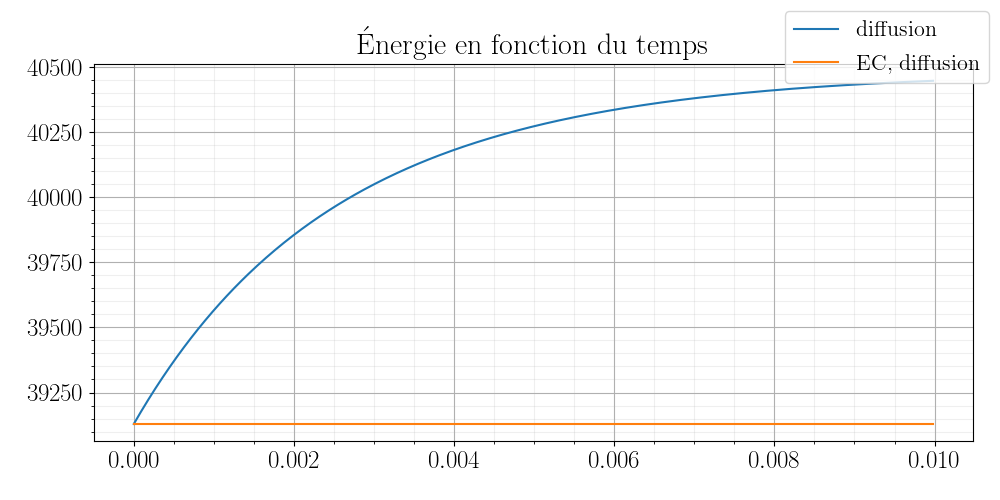


dt fourier
2.232841866976439e-05
diffusion


<IPython.core.display.Javascript object>


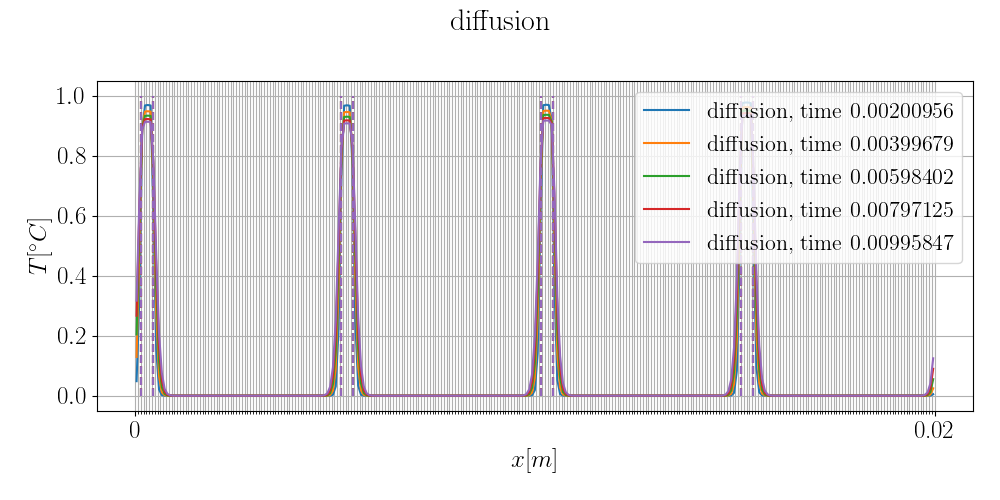

dE*/dt* = 4.24572e-05

dt fourier
2.232841866976439e-05
EC, diffusion


<IPython.core.display.Javascript object>


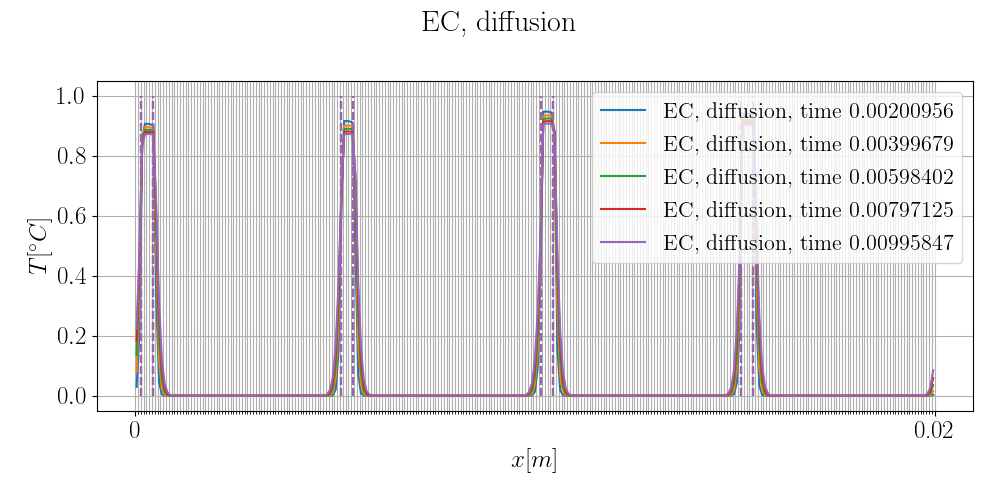

dE*/dt* = -9.90688e-19


-6.938893903907228e-18

In [16]:
t_fin = 0.01
phy_prop = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Perte d'énergie en convection pure

<IPython.core.display.Javascript object>


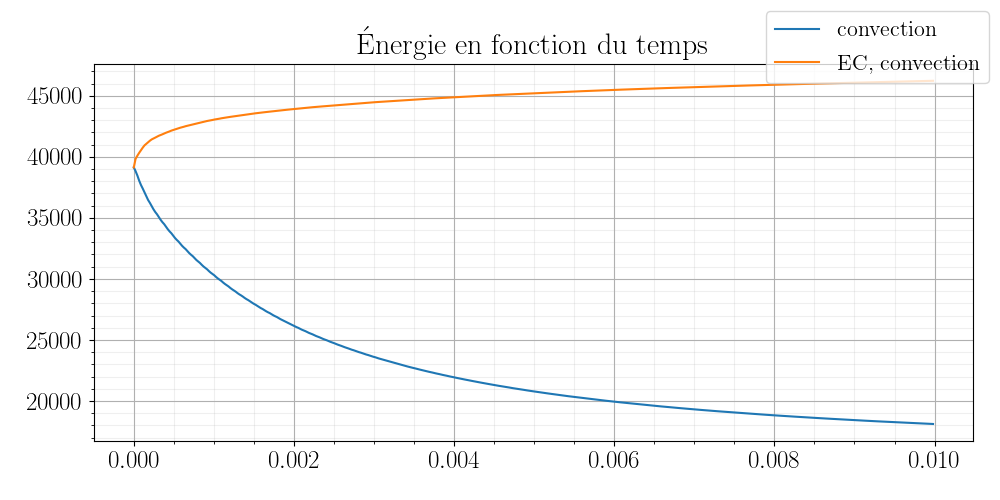


dt fourier
2.232841866976439e-05
convection


<IPython.core.display.Javascript object>


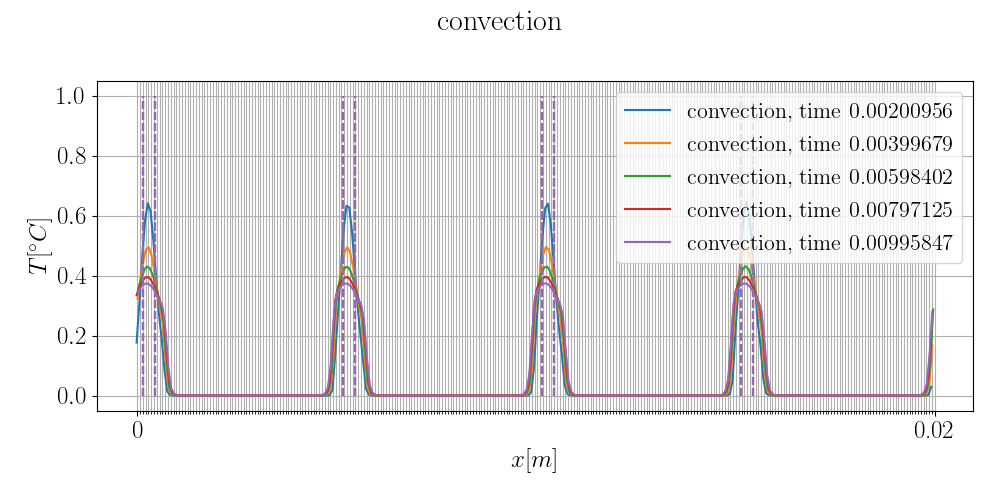

dE*/dt* = -0.000576189

dt fourier
2.232841866976439e-05
EC, convection


<IPython.core.display.Javascript object>


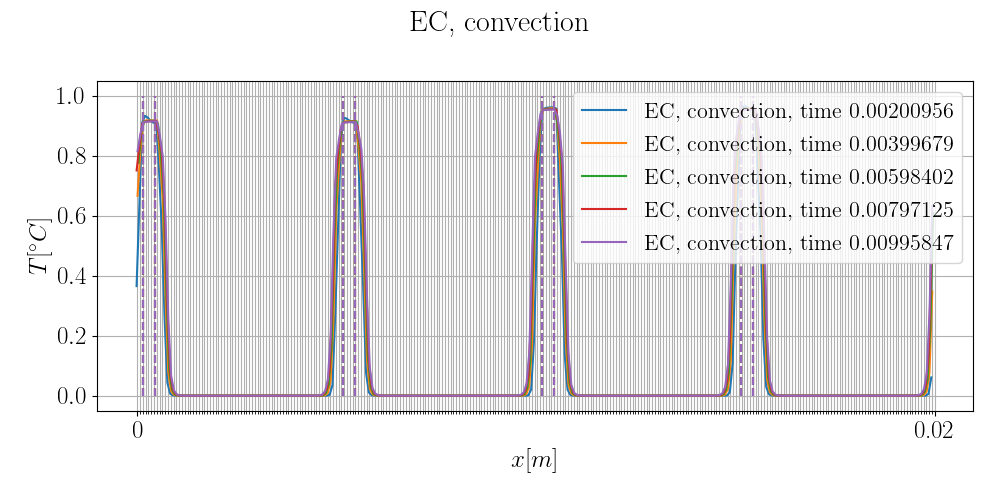

dE*/dt* = 0.000165675


0.0035462448450099965

In [17]:
t_fin = 0.01
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Étude selon les schémas numériques

In [18]:
Schemas = ['upwind', 'center', 'weno', 'weno upwind']
Time_scheme = ['euler', 'rk4']
def compare_energy_schema(schemas, form, time_scheme, phy_prop, markers, t_fin):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for schem in schemas:
        for ts in time_scheme:
            a = Plotter('decale')
            num_prop = NumericalProperties(dx=4*10**-5, schema=schem, time_scheme=ts, phy_prop=phy_prop)
            print()
            prob = form(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
            E0 = prob.energy
            print(prob.name)
            print('==========================')
            t, e = prob.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=5, debug=None, plotter=a)
            a.ax.set_xlim(0., phy_prop.Delta/2)
            a.ax.set_ylim(0.6, 1.1)
            l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
            n = len(e)
            i0 = int(n/5)
            dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
            # par Dt / rho_cp_l T_l V
            print('dE*/dt* = %f' % dedt_adim)
    le = fig1.legend()
    ax1.grid(b=True, which='major')
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', alpha=0.2)

<IPython.core.display.Javascript object>


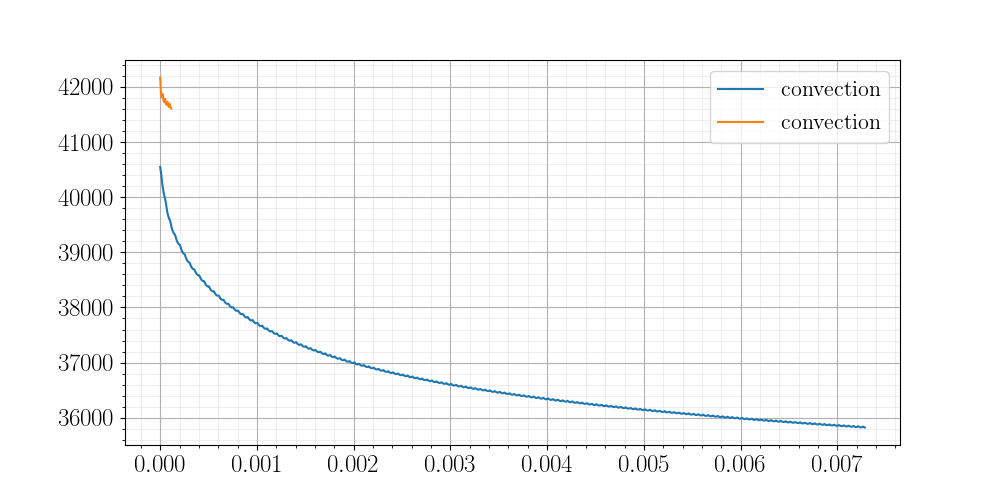


dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


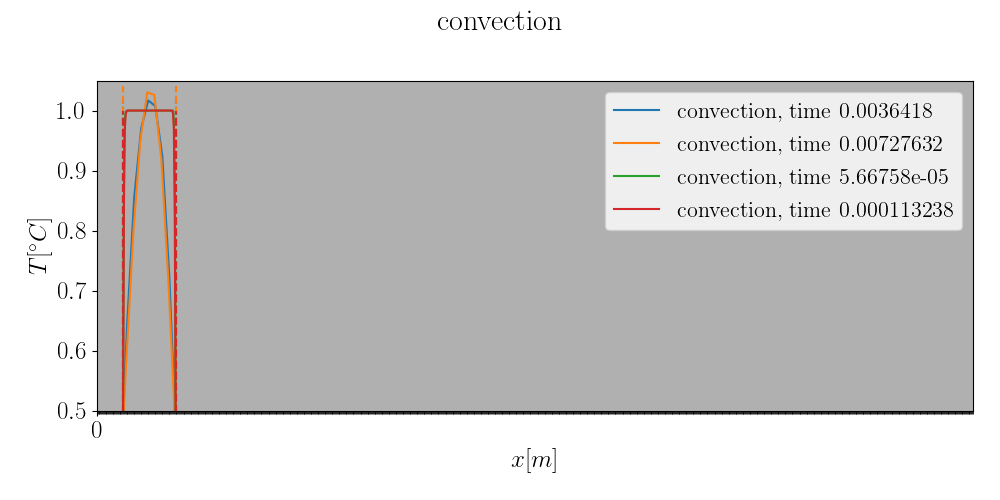


dt fourier
1.1335161290322582e-07
convection
dE*/dt* = -0.000007


In [19]:
t_fin = 0.01
fig1, ax1 = plt.subplots(1)
a = Plotter('decale')
num_prop = NumericalProperties(dx=4*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult

num_prop = NumericalProperties(dx=5*10**-6, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
a.ax.set_ylim(0.5,1.05)
a.ax.set_xlim(0., phy_prop.Delta/4.)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
ax1.legend()
ax1.grid(b=True, which='major')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', alpha=0.2)
n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %f' % dedt_adim)

<IPython.core.display.Javascript object>


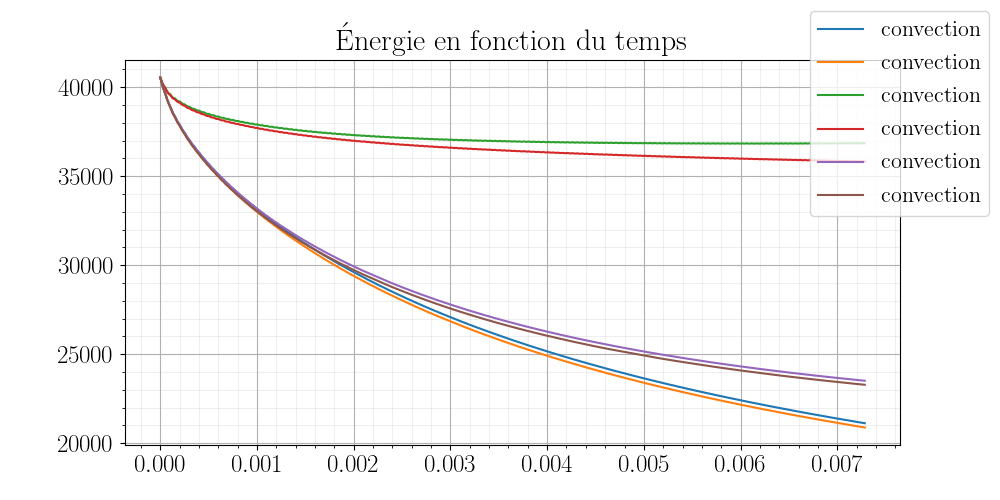


dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


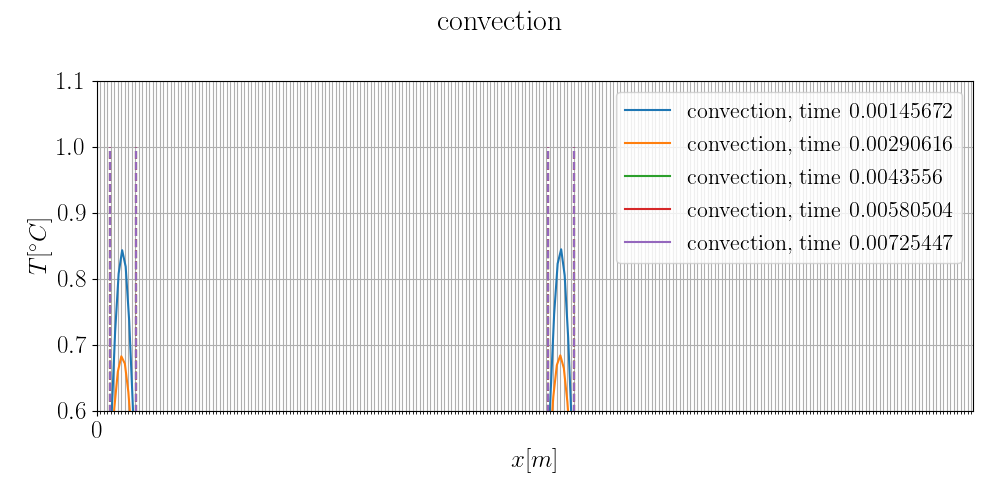

dE*/dt* = -0.000316

dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


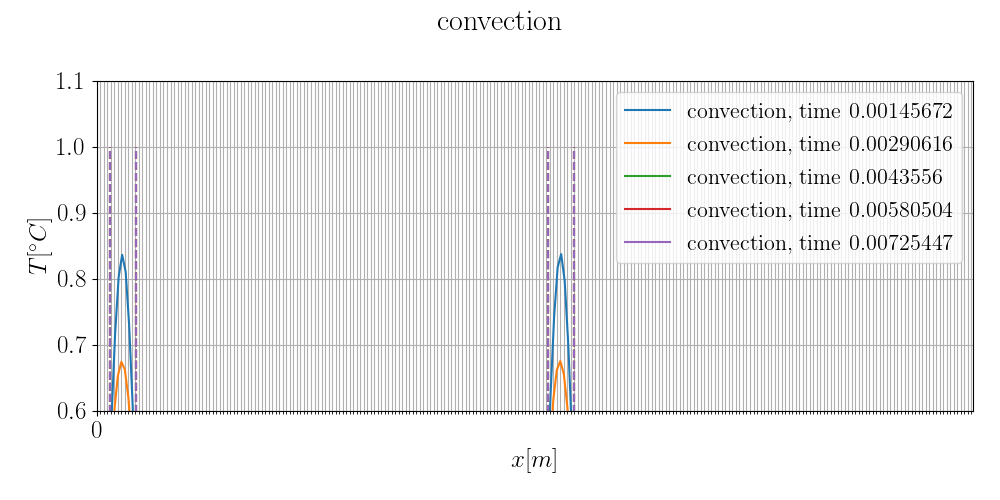

dE*/dt* = -0.000318

dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


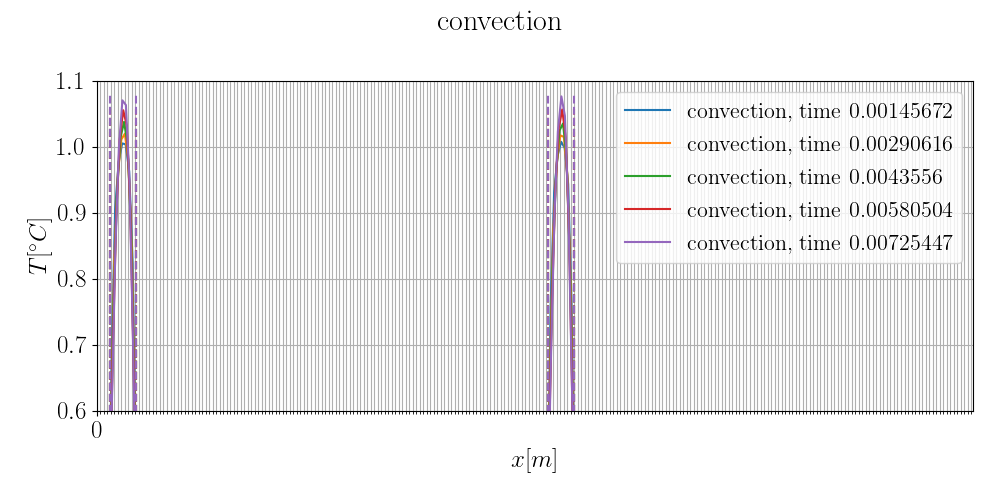

dE*/dt* = -0.000023

dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


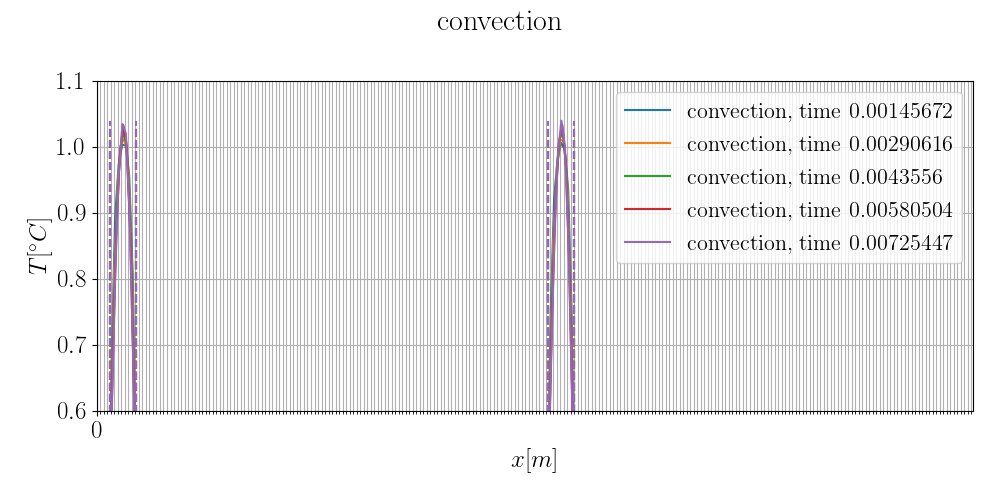

dE*/dt* = -0.000046

dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


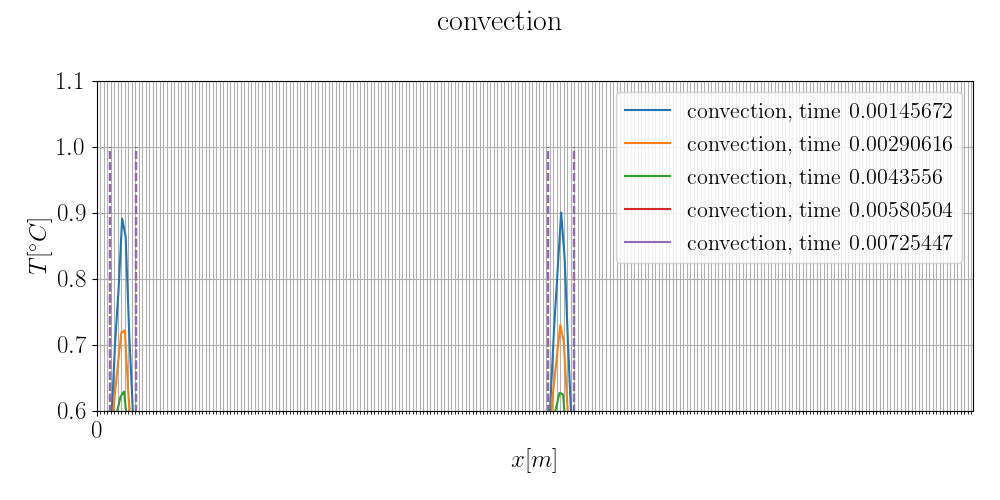

dE*/dt* = -0.000247

dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


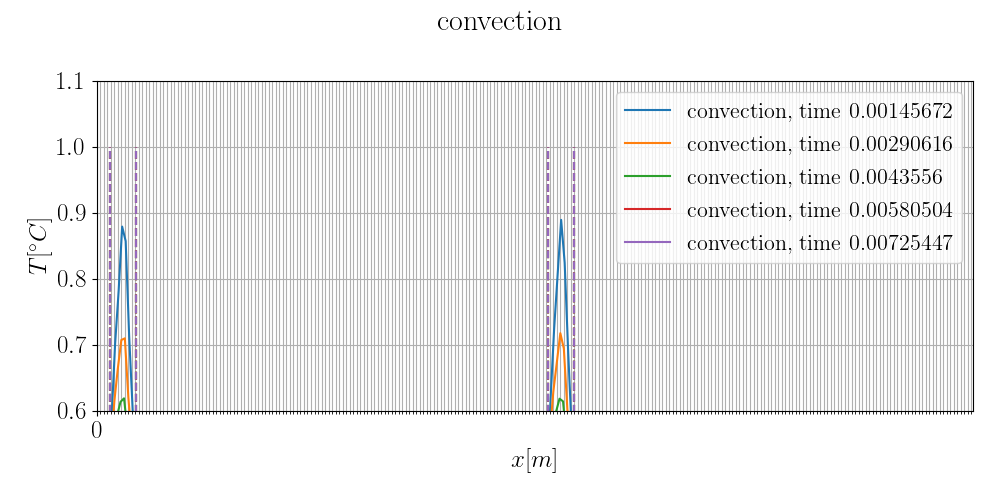

dE*/dt* = -0.000248


In [20]:
t_fin = 0.01
Schemas = ['upwind', 'weno', 'weno upwind']
compare_energy_schema(Schemas, Problem, Time_scheme, phy_prop, markers, t_fin)

<IPython.core.display.Javascript object>


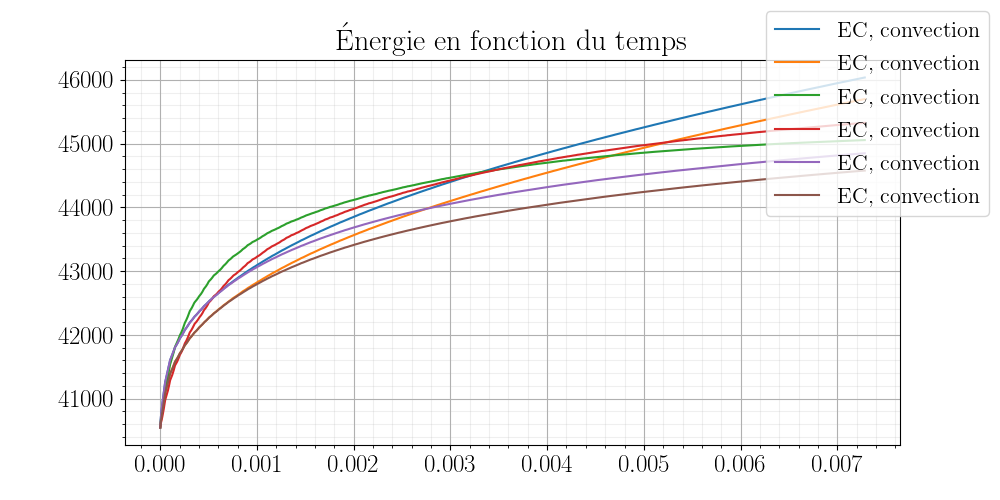


dt fourier
7.283608525474247e-06
EC, convection


<IPython.core.display.Javascript object>


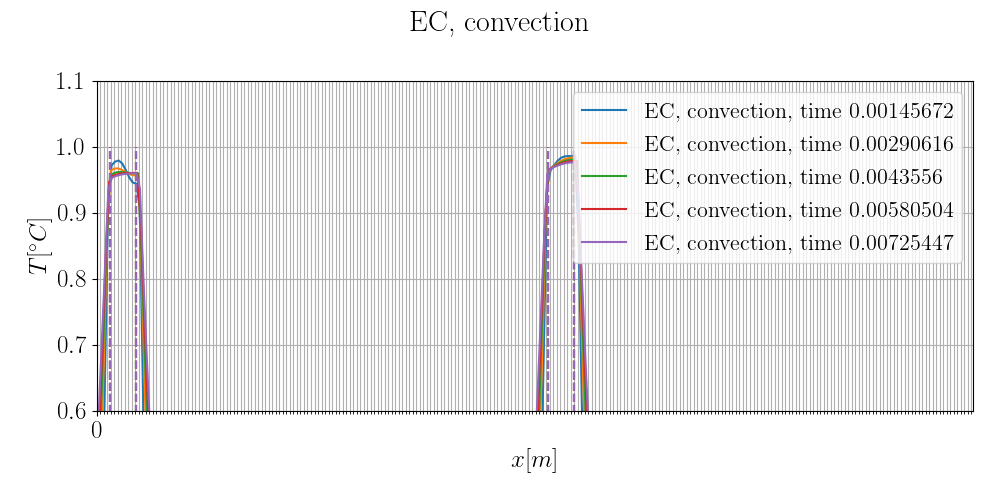

dE*/dt* = 0.000079

dt fourier
7.283608525474247e-06
EC, convection


<IPython.core.display.Javascript object>


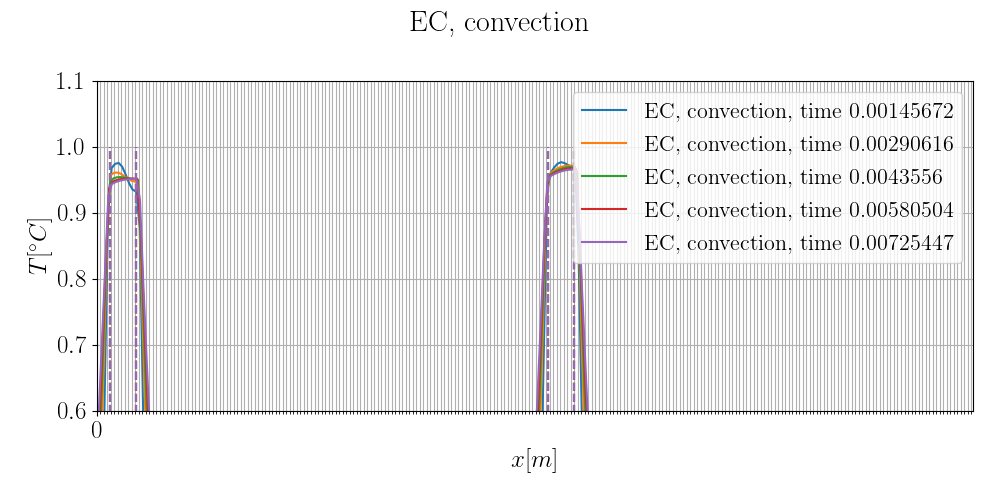

dE*/dt* = 0.000077

dt fourier
7.283608525474247e-06
EC, convection


<IPython.core.display.Javascript object>


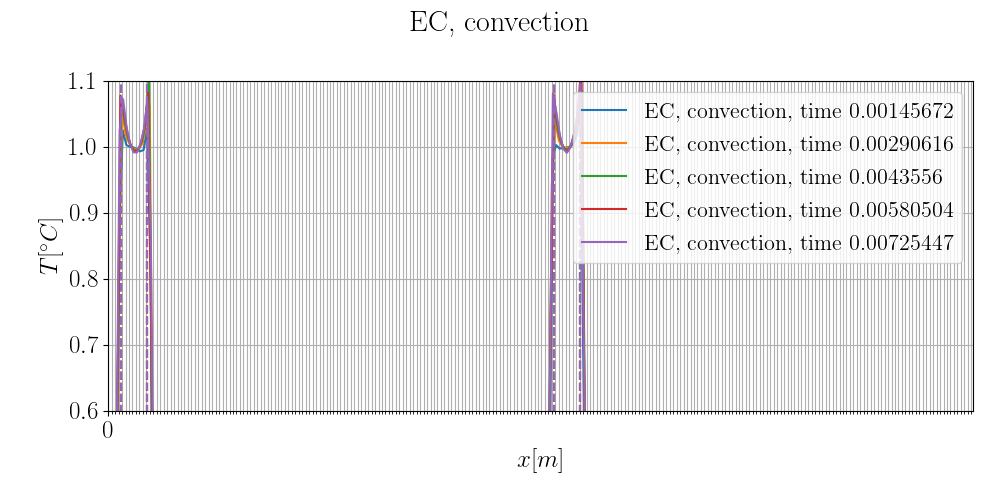

dE*/dt* = 0.000037

dt fourier
7.283608525474247e-06
EC, convection


<IPython.core.display.Javascript object>


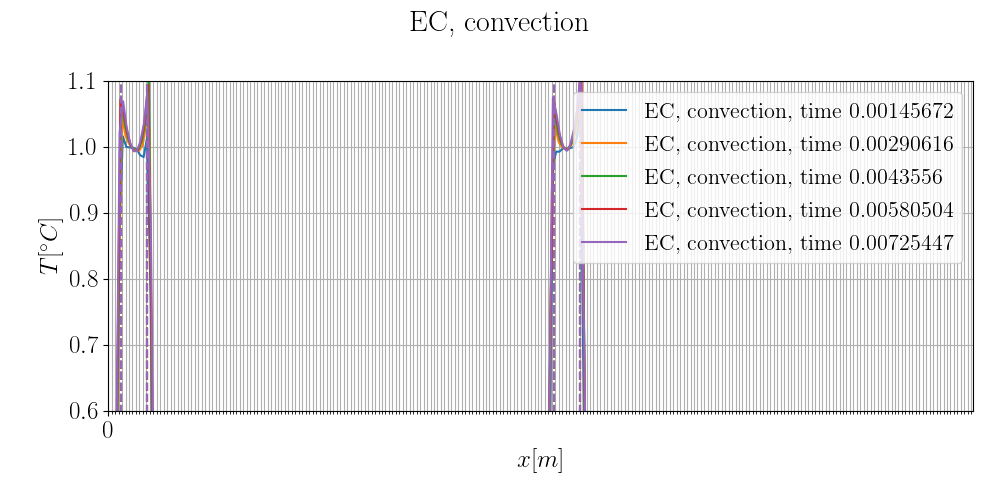

dE*/dt* = 0.000052

dt fourier
7.283608525474247e-06
EC, convection


<IPython.core.display.Javascript object>


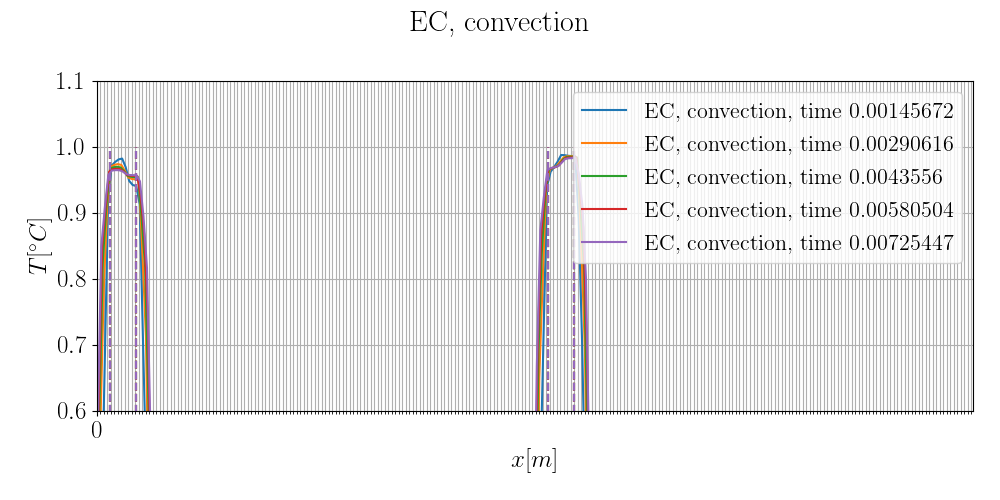

dE*/dt* = 0.000045

dt fourier
7.283608525474247e-06
EC, convection


<IPython.core.display.Javascript object>


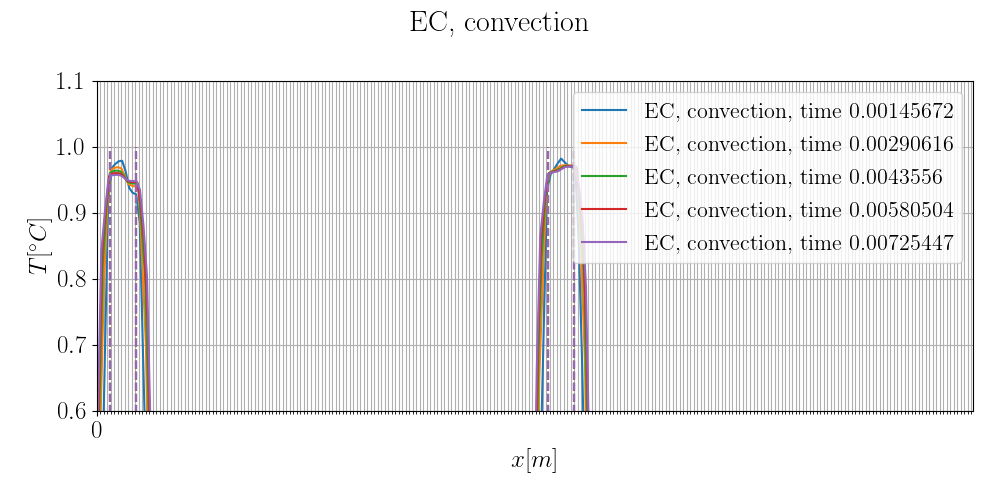

dE*/dt* = 0.000045


In [21]:
Schemas = ['upwind', 'weno', 'weno upwind']
Time_scheme = ['euler', 'rk4']
compare_energy_schema(Schemas, ProblemConserv2, Time_scheme, phy_prop, markers, t_fin)

# Profiling du code

<IPython.core.display.Javascript object>


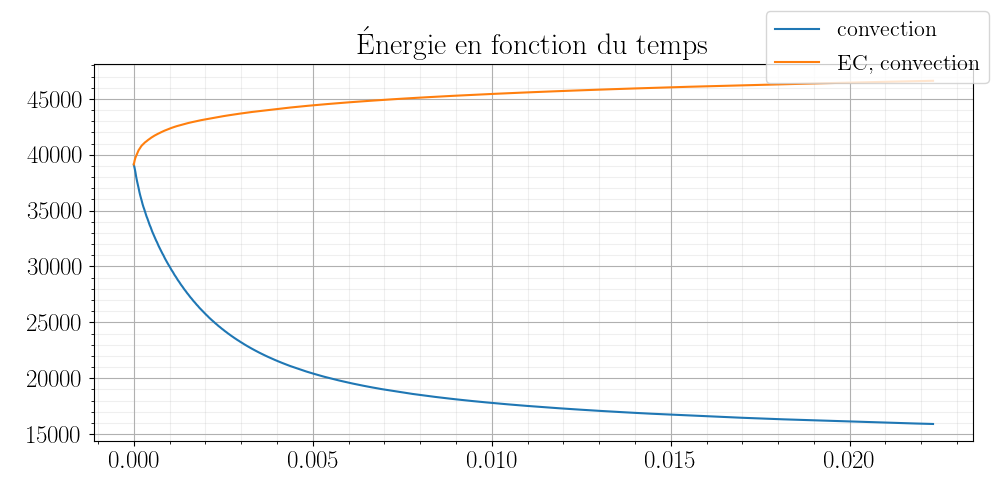


dt fourier
2.232841866976439e-05
convection


<IPython.core.display.Javascript object>


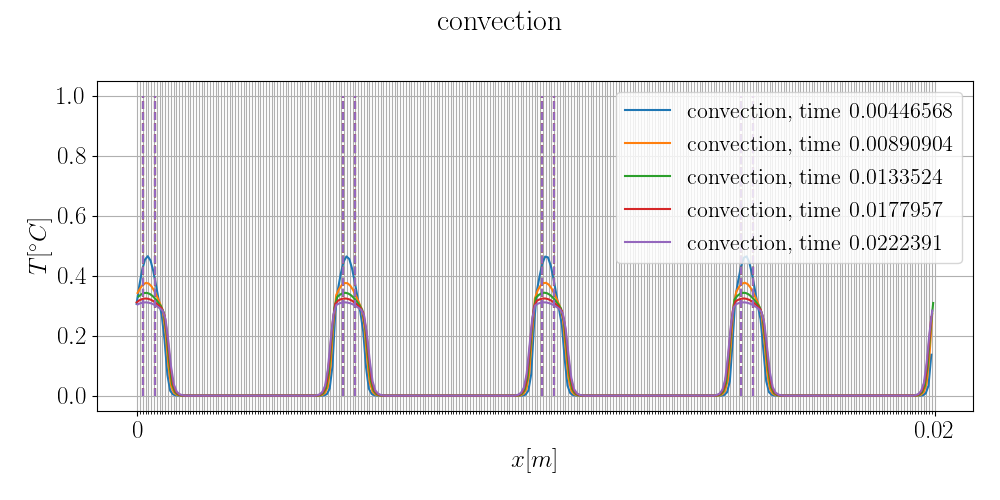

dE*/dt* = -0.000162127

dt fourier
2.232841866976439e-05
EC, convection


<IPython.core.display.Javascript object>


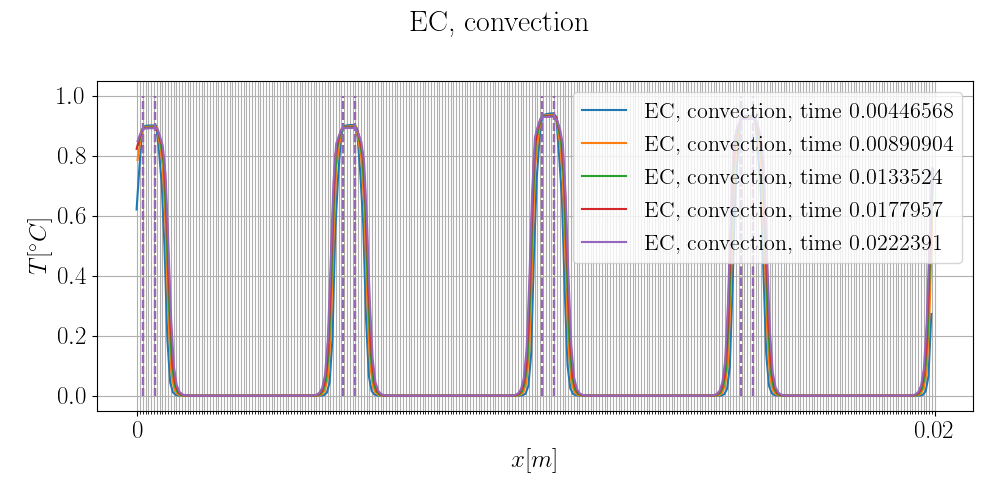

dE*/dt* = 7.5457e-05
Timer unit: 1e-06 s

Total time: 1.56441 s
File: /home/as259691/PycharmProjects/FluidDyn1D/src/main.py
Function: indicatrice_liquide at line 352

Line #      Hits         Time  Per Hit   % Time  Line Contents
   352                                               def indicatrice_liquide(self, x):
   353                                                   """
   354                                                   Calcule l'indicatrice qui correspond au liquide avec les marqueurs selon la grille x
   355                                           
   356                                                   Args:
   357                                                       x: les positions des centres des mailles
   358                                           
   359                                                   Returns:
   360                                                       l'indicatrice
   361                                                   """
   362     14

In [22]:
from line_profiler import LineProfiler
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop, dt=1.)
lp = LineProfiler()
func = [Problem._rk4_timestep, Bulles.indicatrice_liquide]
for fu in func:
    lp.add_function(fu)   # add additional function to profile
lp_wrapper = lp(compare_energy_forme)
lp_wrapper(Formulation, phy_prop, num_prop, markers, 0.1)
lp.print_stats()

# Comparaison des meilleurs cas pour chaque formulation

<IPython.core.display.Javascript object>


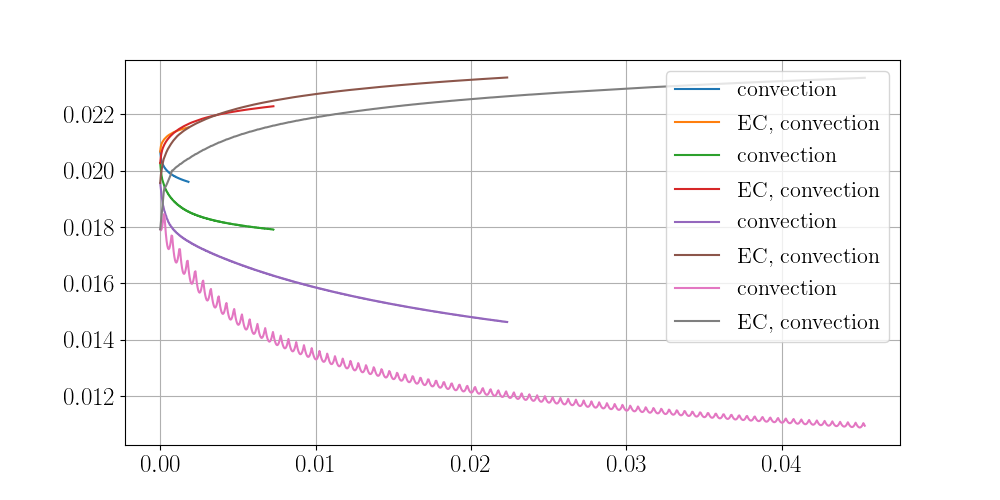

~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
1.8172585062055175e-06
convection


<IPython.core.display.Javascript object>


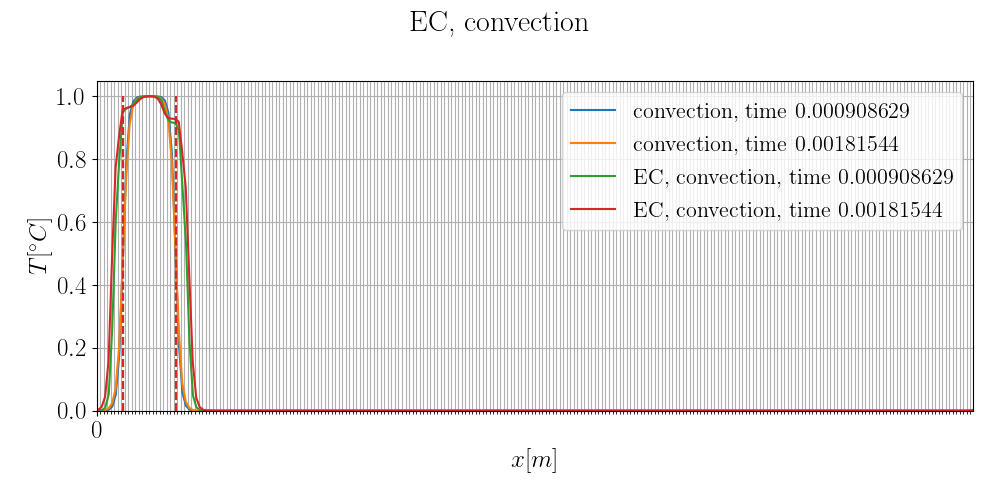

dE/dt = -1.32809e-11

dt fourier
1.8172585062055175e-06
EC, convection
dE/dt = 4.48174e-07
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
7.283608525474247e-06
convection


<IPython.core.display.Javascript object>


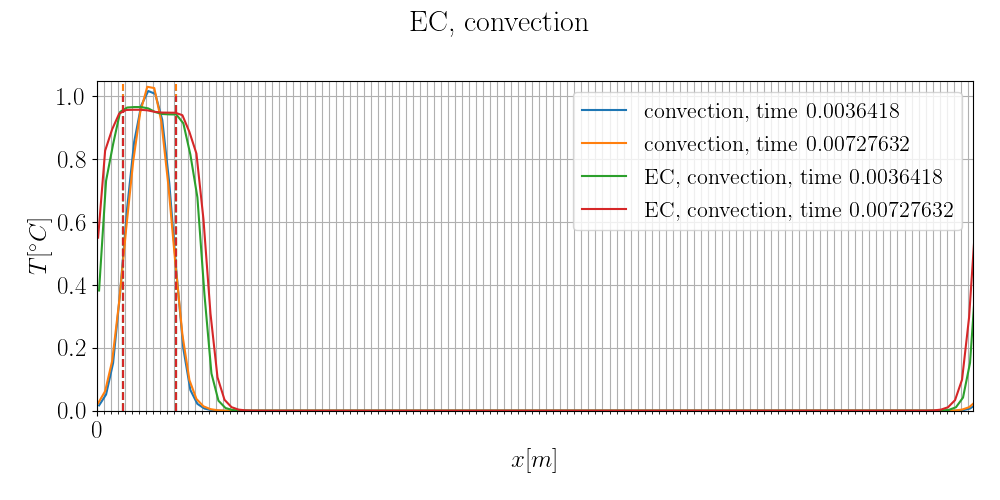

dE/dt = -2.32286e-11

dt fourier
7.283608525474247e-06
EC, convection
dE/dt = 9.08139e-07
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
2.232841866976439e-05
convection


<IPython.core.display.Javascript object>


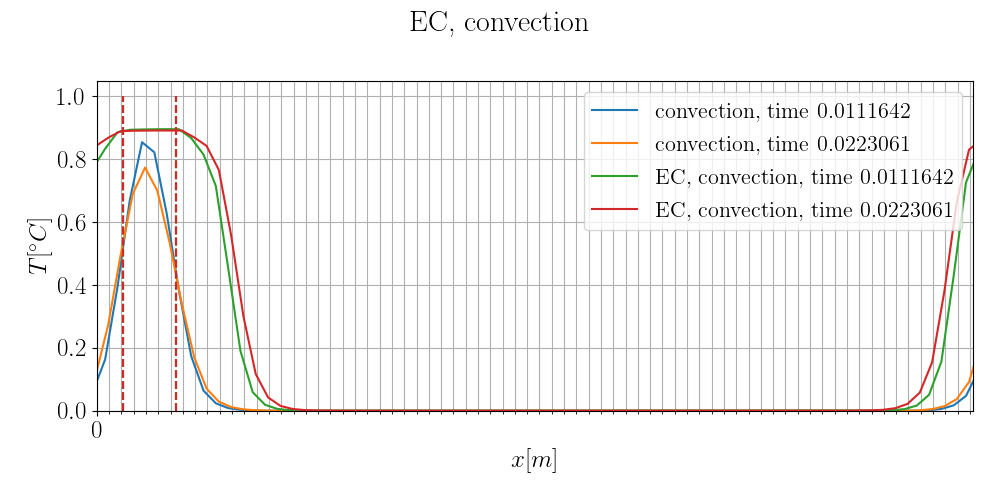

dE/dt = -6.93008e-11

dt fourier
2.232841866976439e-05
EC, convection
dE/dt = 1.47628e-06
~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
4.534064516129032e-05
convection


<IPython.core.display.Javascript object>


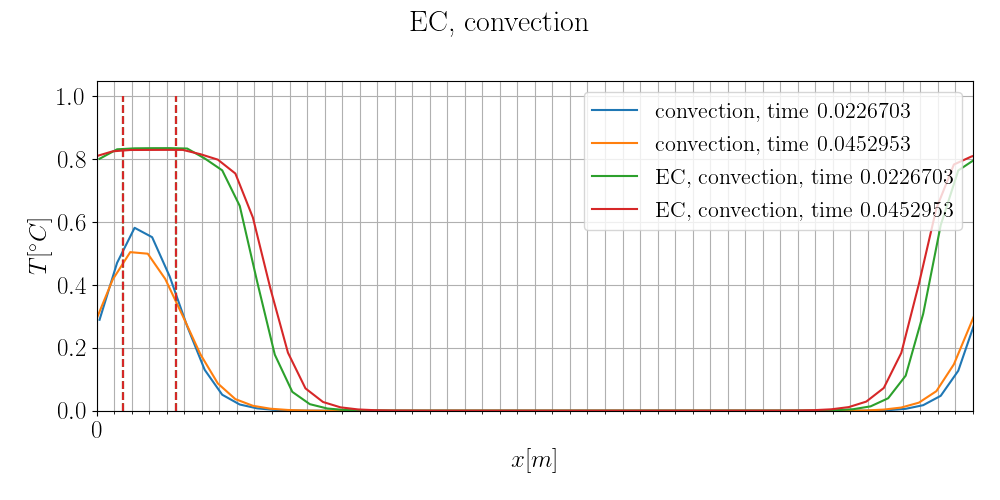

dE/dt = -8.89124e-11

dt fourier
4.534064516129032e-05
EC, convection
dE/dt = 1.86878e-06


In [23]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)

for dx in [2*10**-5, 4*10**-5, 7*10**-5, 10*10**-5]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    a = Plotter('decale')
    num_prop = NumericalProperties(dx=dx, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print('dE/dt = %g' % dedt_adim)

    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = ProblemConserv2(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt 
    print('dE/dt = %g' % dedt_adim)
    
    a.ax.set_ylim(0.,1.05)
    a.ax.set_xlim(0., phy_prop.Delta/4.)
    ax1.legend()
    ax1.grid(b=True)

In [24]:
markers.shift(10**-6/7.)

<IPython.core.display.Javascript object>


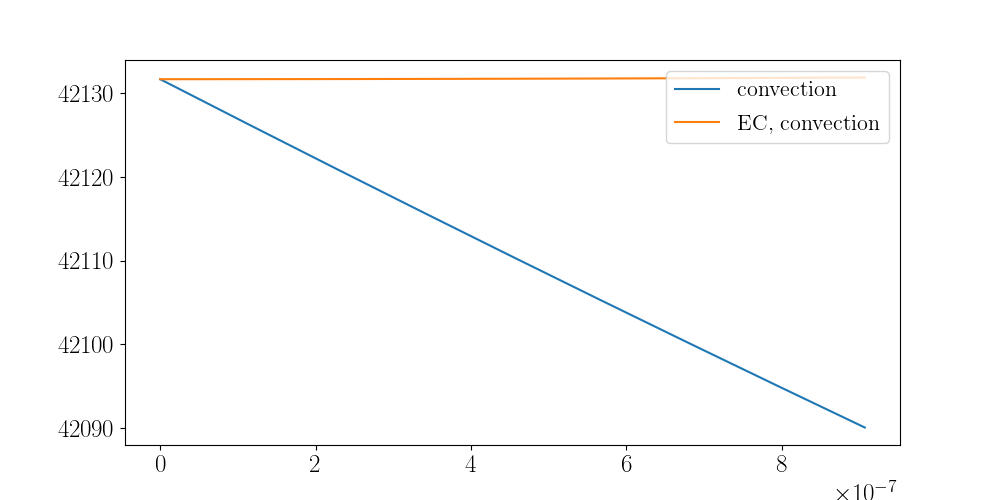

~~~~~~~~~~~~~~~~~~~~~~~~~~

dt fourier
1.1335161290322582e-07
convection


<IPython.core.display.Javascript object>


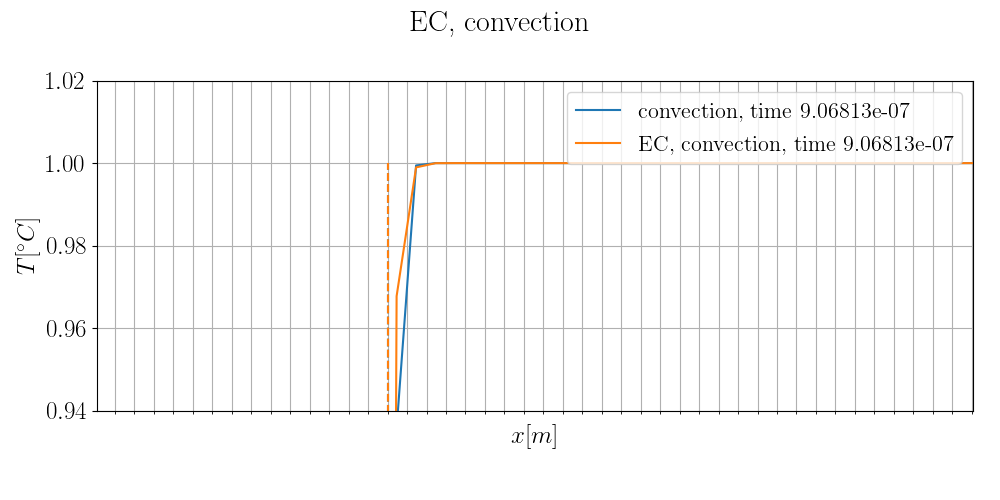

dE/dt = -0.000122952

dt fourier
1.1335161290322582e-07
EC, convection
dE/dt = 1.41538e-08


In [25]:
# %matplotlib inline
# rc('figure', figsize=(10,7))
# rc('figure', dpi=100)
n = 1000
t_fin = 10**-6
fig1, ax1 = plt.subplots(1)

for dx in [5*10**-6]:  # , 4*10**-6, 3*10**-6, 2*10**-6, 1*10**-6]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    a = Plotter('decale')
    num_prop = NumericalProperties(dx=dx, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(n=min(n, n_max), t_fin=t_fin, number_of_plots=1, plotter=a)
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print('dE/dt = %g' % dedt_adim)

    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=min(n, n_max), number_of_plots=1, plotter=a)
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt 
    print('dE/dt = %g' % dedt_adim)
    
    a.ax.set_ylim(0.94,1.02)
    a.ax.set_xlim(prob_ref.bulles.markers[0][0] - prob_ref.bulles.diam / 4., prob_ref.bulles.markers[0][0] + prob_ref.bulles.diam / 2.,)
    ax1.legend()
#     ax1.grid(b=True, which='both')

if save_fig:
    a.fig.savefig(savefig_path + 'comparaison_energie_temperature.pdf')